In [100]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [99]:
p_load("EnhancedVolcano", "dplyr", "ggpubr", install = FALSE)

In [73]:
matrix_pathway <- read.table("01_raw_data/R-HSA-1474244.txt", header = TRUE)

## Wald DE

### Cpos vs Cneg

In [74]:
ccl4_cpos_cneg <- read.csv("03_outputs/03/de_ccl4_cpos_cneg_sig_wald.csv", row.names = 1)

In [75]:
taa_cpos_cneg <- read.csv("03_outputs/03/de_taa_cpos_cneg_sig_wald.csv", row.names = 1)

In [76]:
keyvals_taa <- ifelse(
taa_cpos_cneg$log2FoldChange < -2, '#F0810F',
  ifelse(taa_cpos_cneg$log2FoldChange > 2, '#F0810F',
    'grey'))

names(keyvals_taa)[keyvals_taa == '#F0810F'] <- 'high'
names(keyvals_taa)[keyvals_taa == 'grey'] <- 'mid'
names(keyvals_taa)[keyvals_taa == '#F0810F'] <- 'low'

In [77]:
keyvals_ccl4 <- ifelse(
ccl4_cpos_cneg$log2FoldChange < -2, '#063852',
  ifelse(ccl4_cpos_cneg$log2FoldChange > 2, '#063852',
    'grey'))

In [78]:
names(keyvals_ccl4)[keyvals_ccl4 == '#063852'] <- 'high'
names(keyvals_ccl4)[keyvals_ccl4 == 'grey'] <- 'mid'
names(keyvals_ccl4)[keyvals_ccl4 == '#063852'] <- 'low'

In [79]:
gene_set_matrix_immune <- matrix_pathway$Gene

Warning message:
"ggrepel: 874 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


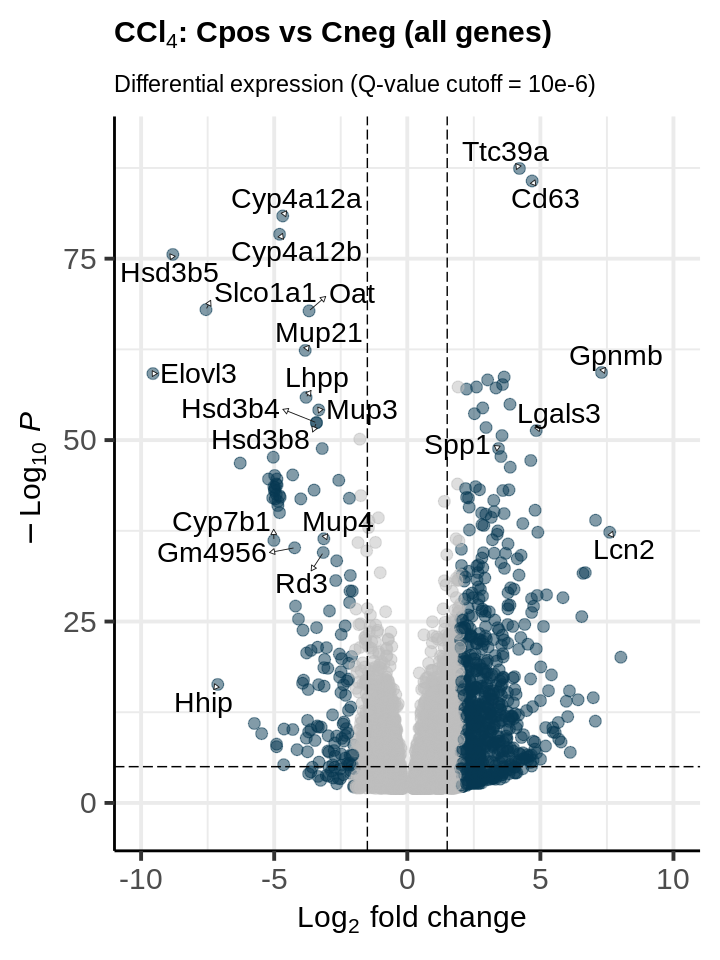

In [80]:
options(repr.plot.width = 6, repr.plot.height = 8)

ccl_all <- EnhancedVolcano(ccl4_cpos_cneg,
                lab = rownames(ccl4_cpos_cneg),
                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals_ccl4,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = expression(bold(paste(CCl[4], ": Cpos vs Cneg (all genes)",sep=""))),
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 10
               ) + theme(legend.position = "none")

ccl_all

Warning message:
"ggrepel: 145 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


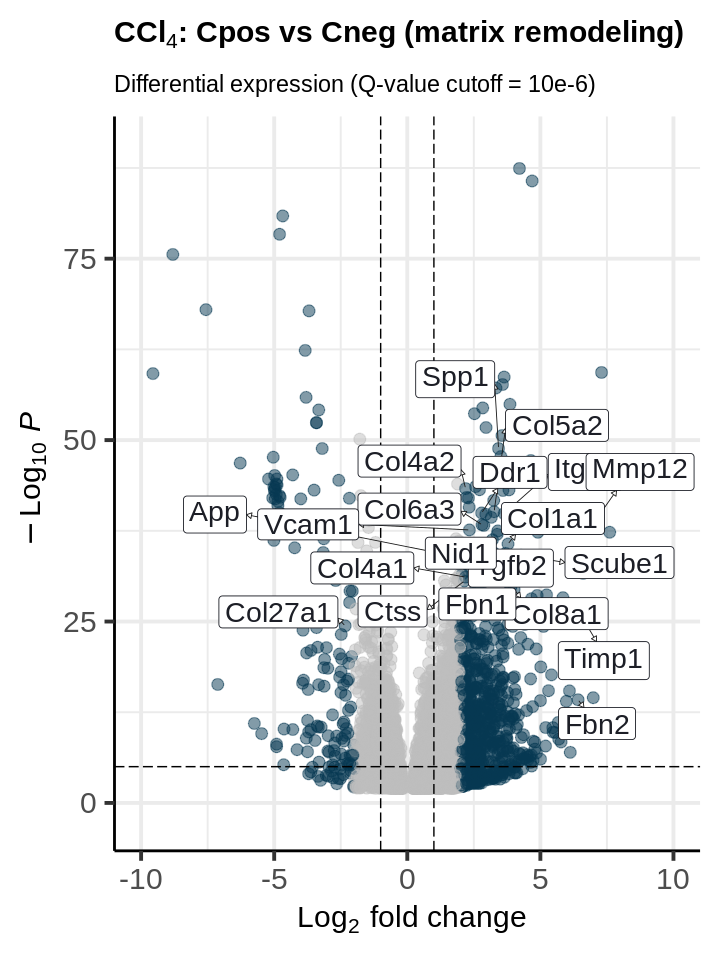

In [81]:
ccl4_target <- EnhancedVolcano(ccl4_cpos_cneg,
                lab = rownames(ccl4_cpos_cneg),
                selectLab = gene_set_matrix_immune,
                colCustom = keyvals_ccl4,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = expression(bold(paste(CCl[4], ": Cpos vs Cneg (matrix remodeling)",sep=""))),
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
                pCutoff = 10e-6,
                FCcutoff = 1,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 20,
                boxedLabels = TRUE,
                parseLabels = TRUE,
                labCol = '#1C1E26'
               ) + theme(legend.position = "none")

ccl4_target

In [82]:
gene_set_taa <- matrix_pathway$Gene

Warning message:
"ggrepel: 1472 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


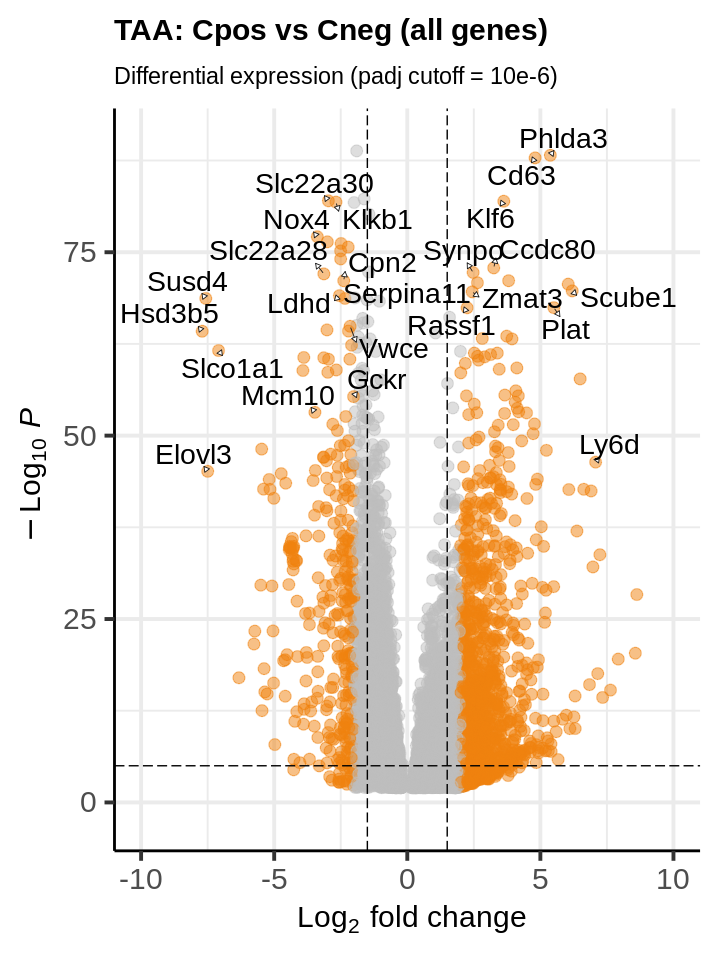

In [83]:
taa_all <- EnhancedVolcano(taa_cpos_cneg,
                lab = rownames(taa_cpos_cneg),
                selectLab = rownames(taa_cpos_cneg)[which(names(keyvals_taa) %in% c('high', 'low'))],
                colCustom = keyvals_taa,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = "TAA: Cpos vs Cneg (all genes)",
                subtitle = "Differential expression (padj cutoff = 10e-6)",
                caption = NULL,
#                legend.position = "none",
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 10,
               ) + theme(legend.position = "none")

taa_all

Warning message:
"ggrepel: 170 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


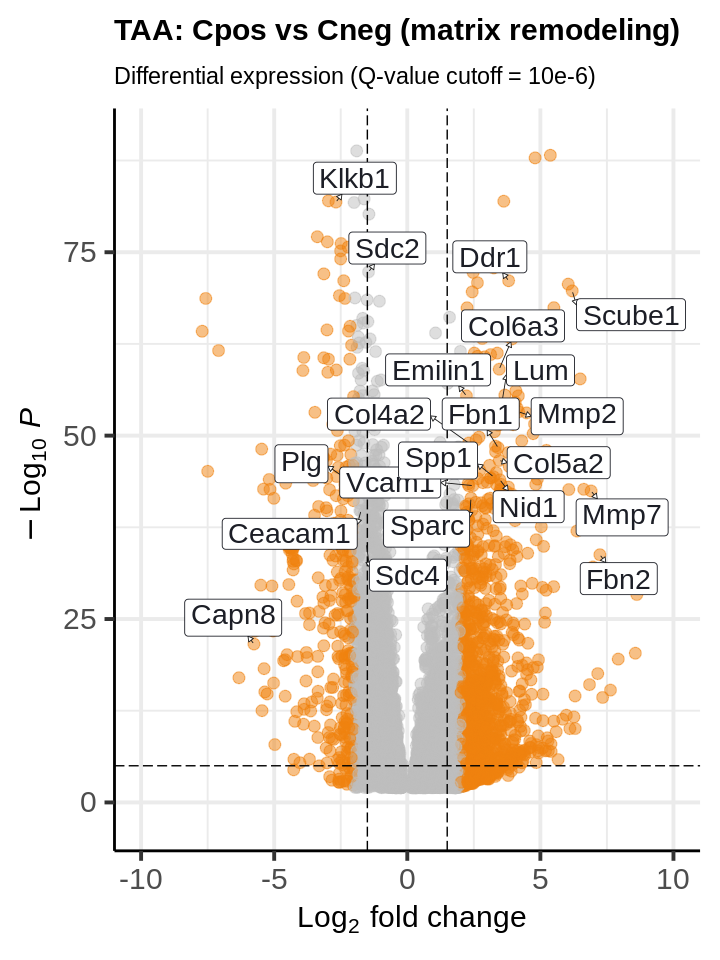

In [84]:
taa_target <- EnhancedVolcano(taa_cpos_cneg,
                lab = rownames(taa_cpos_cneg),
                selectLab = gene_set_taa,
                colCustom = keyvals_taa,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = "TAA: Cpos vs Cneg (matrix remodeling)",
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
#                legend.position = "none",
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 20,
                boxedLabels = TRUE,
                parseLabels = TRUE,
                labCol = '#1C1E26'
               ) + theme(legend.position = "none")

taa_target

Warning message:
"ggrepel: 886 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1486 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 186 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 158 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


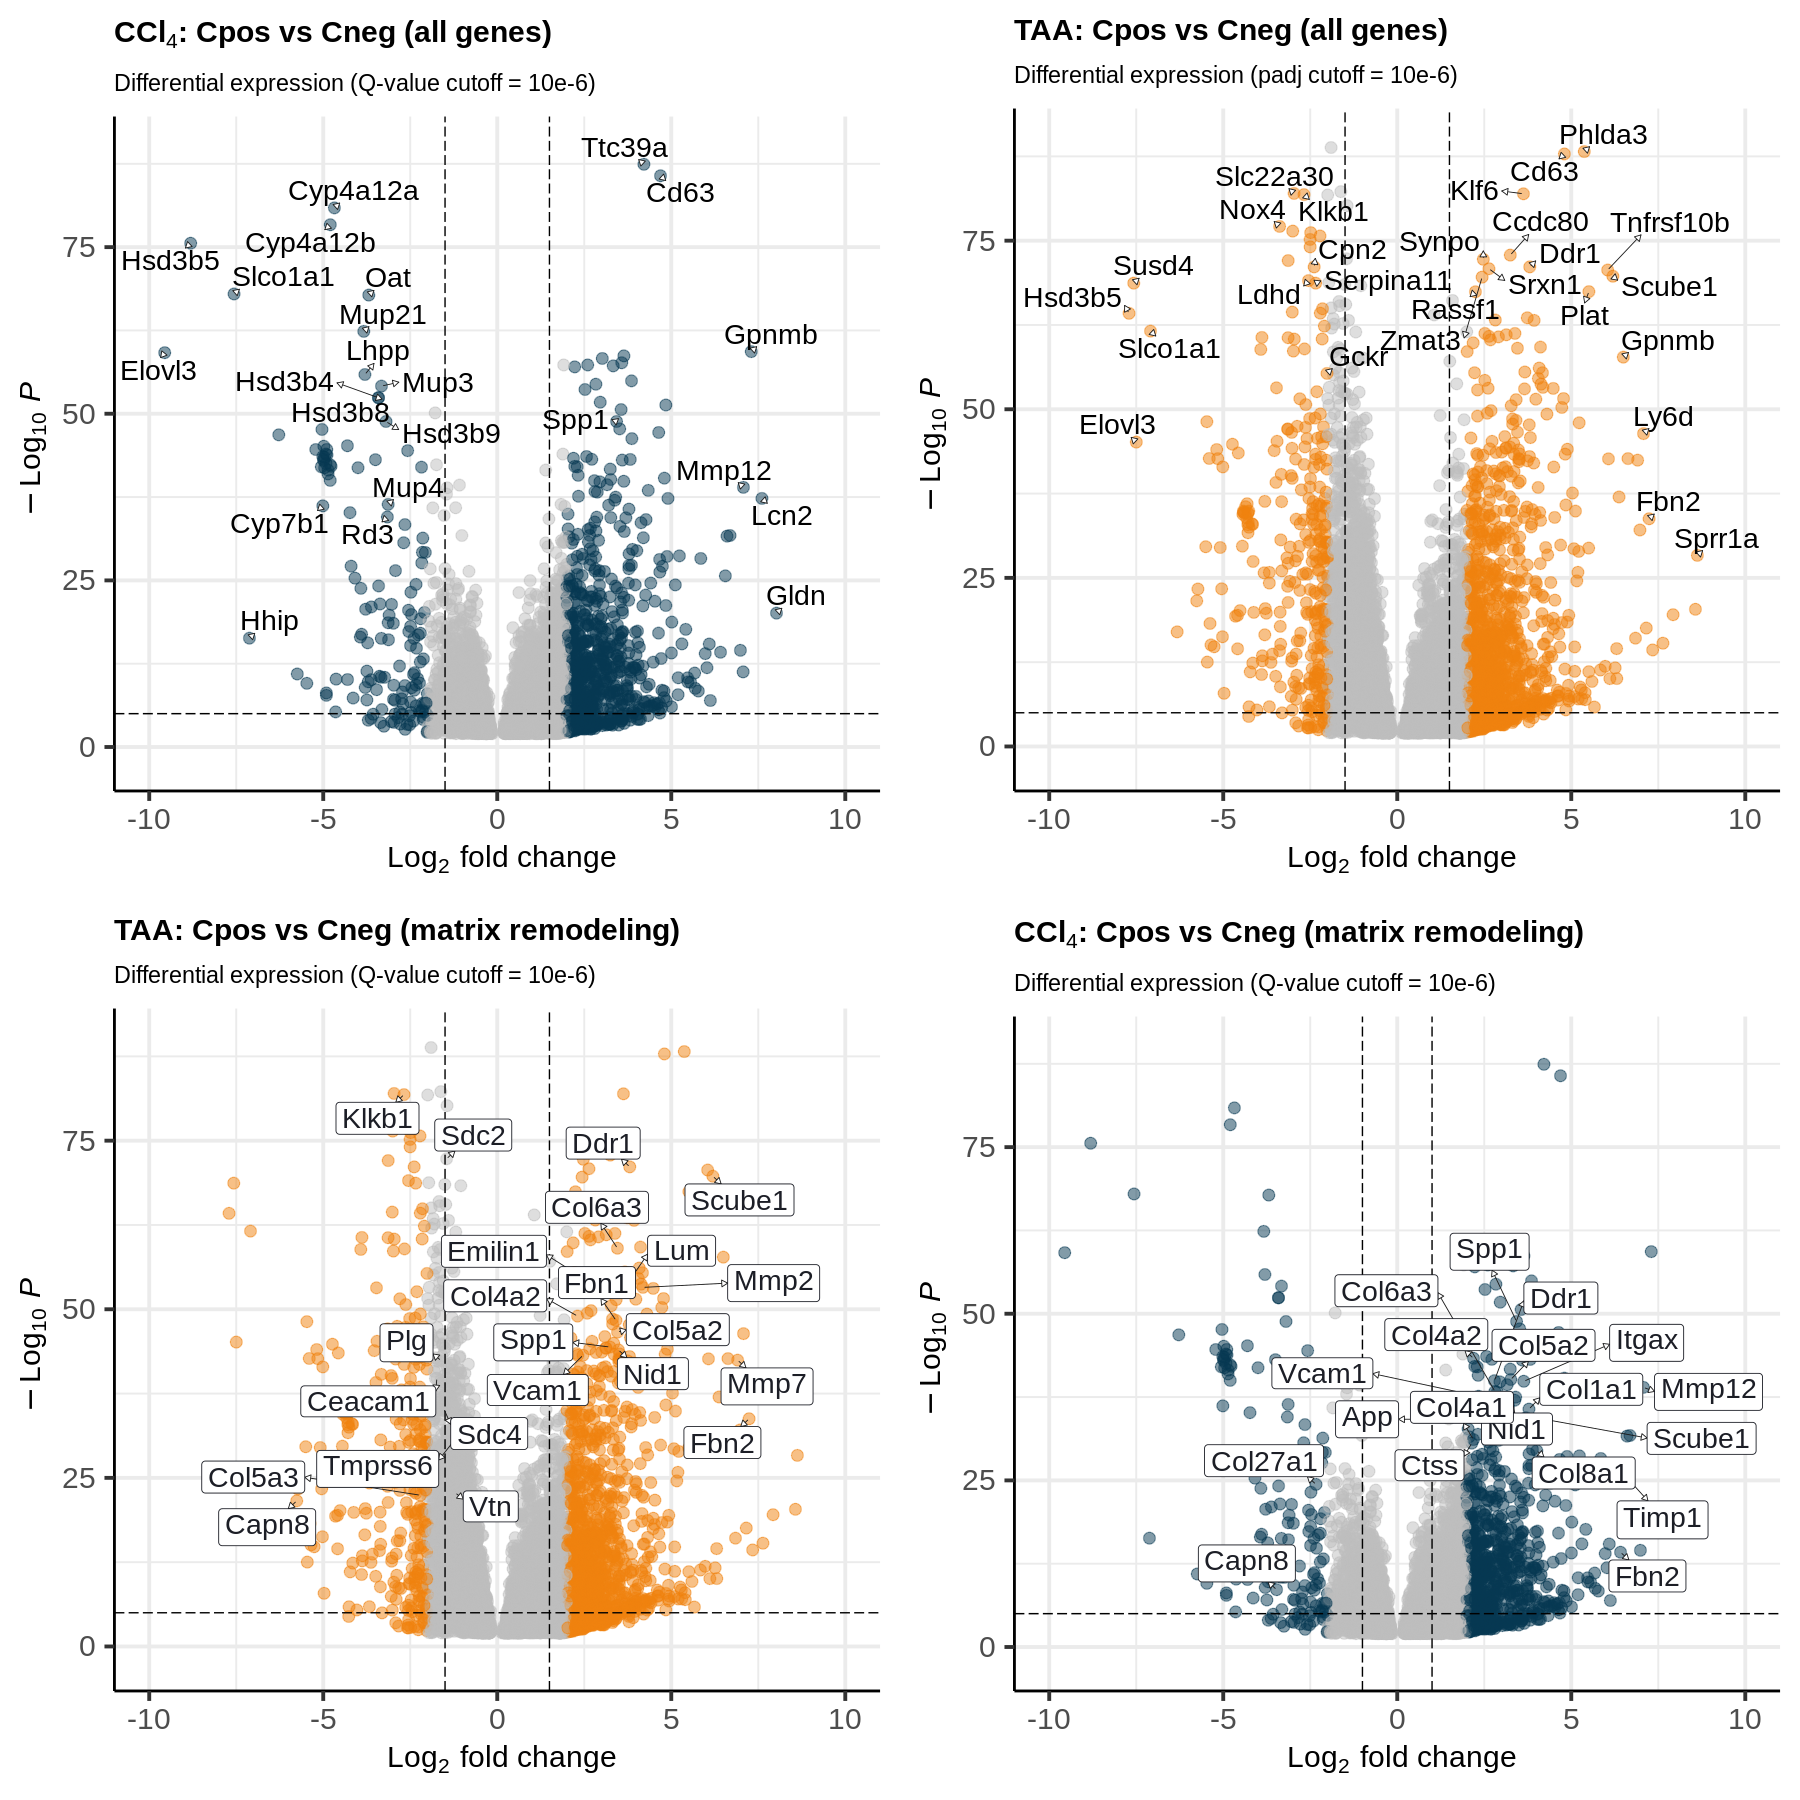

In [85]:
options(repr.plot.width = 15, repr.plot.height = 15)

p_all <- ggarrange(ccl_all, taa_all, taa_target, ccl4_target,
          ncol = 2, nrow = 2)

p_all

### Reg vs Cpos

In [86]:
ccl4_reg_pos <- read.csv("03_outputs/03/de_ccl4_reg_pos_sig_wald.csv", row.names = 1)

In [87]:
taa_reg_pos <- read.csv("03_outputs/03/de_taa_reg_pos_sig_wald.csv", row.names = 1)

In [88]:
keyvals_taa <- ifelse(
taa_reg_pos$log2FoldChange < -2, '#F0810F',
  ifelse(taa_reg_pos$log2FoldChange > 2, '#F0810F',
    'grey'))

names(keyvals_taa)[keyvals_taa == '#F0810F'] <- 'high'
names(keyvals_taa)[keyvals_taa == 'grey'] <- 'mid'
names(keyvals_taa)[keyvals_taa == '#F0810F'] <- 'low'

In [89]:
keyvals_ccl4 <- ifelse(
ccl4_reg_pos$log2FoldChange < -2, '#063852',
  ifelse(ccl4_reg_pos$log2FoldChange > 2, '#063852',
    'grey'))

In [90]:
names(keyvals_ccl4)[keyvals_ccl4 == '#063852'] <- 'high'
names(keyvals_ccl4)[keyvals_ccl4 == 'grey'] <- 'mid'
names(keyvals_ccl4)[keyvals_ccl4 == '#063852'] <- 'low'

In [91]:
gene_set_matrix_immune <- matrix_pathway$Gene

Warning message:
"ggrepel: 171 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


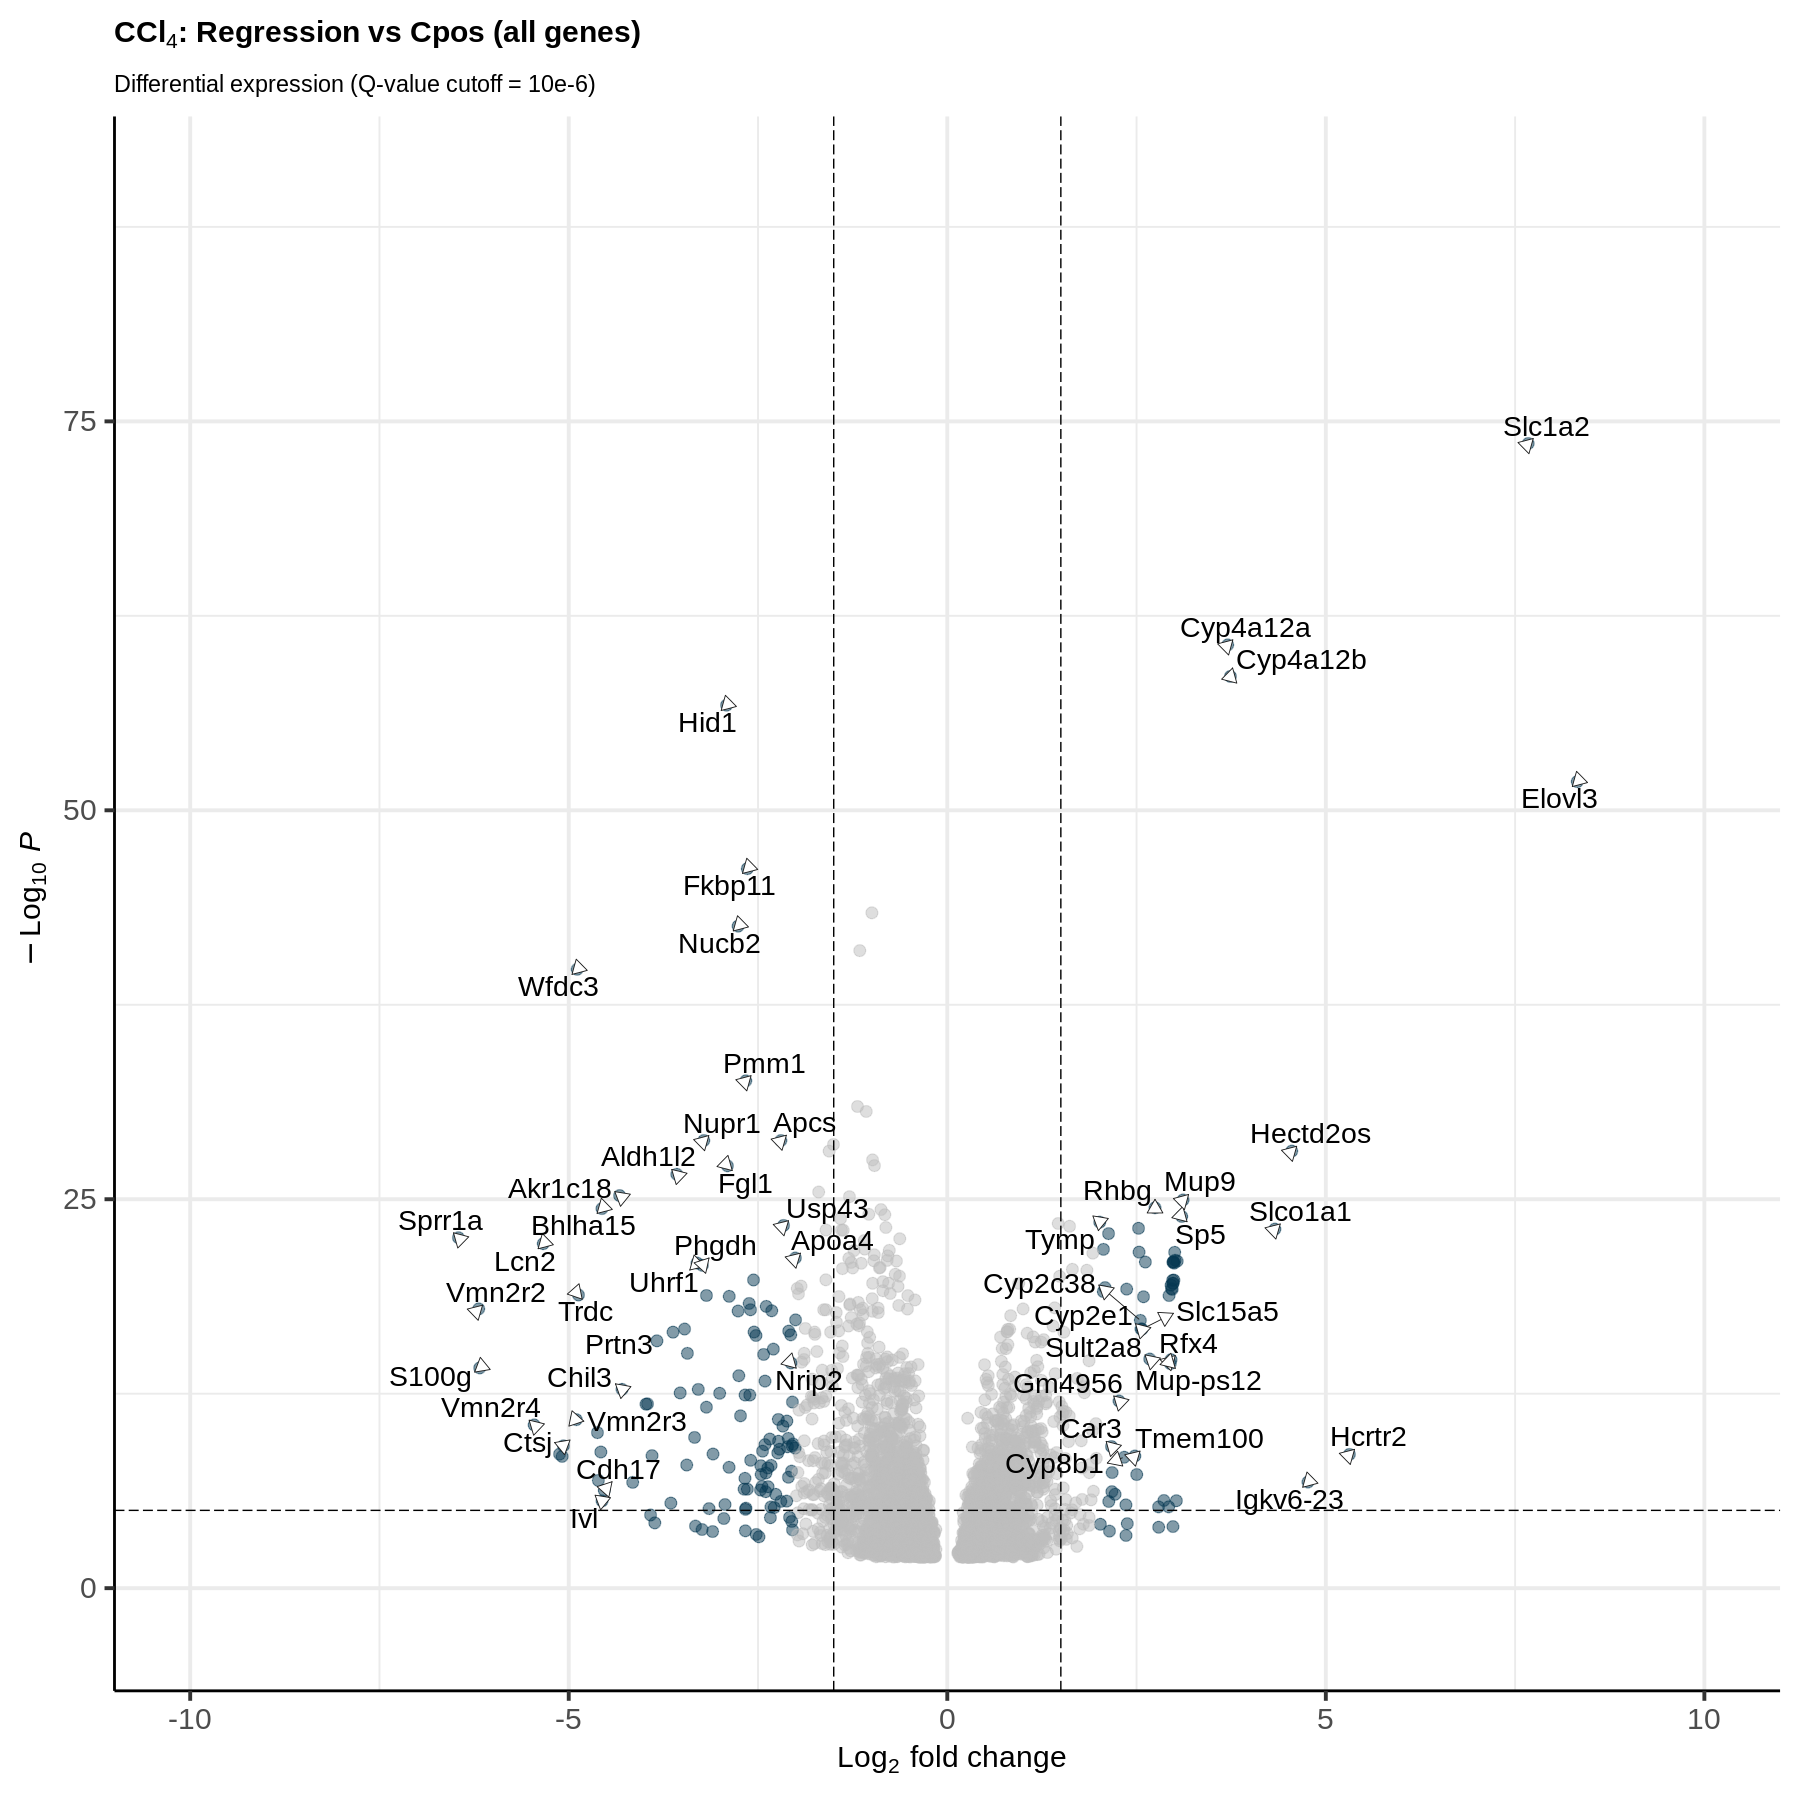

In [92]:
ccl_all_reg <- EnhancedVolcano(ccl4_reg_pos,
                lab = rownames(ccl4_reg_pos),
                selectLab = rownames(ccl4_reg_pos)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals_ccl4,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = expression(bold(paste(CCl[4], ": Regression vs Cpos (all genes)",sep=""))),
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 10
               ) + theme(legend.position = "none")

ccl_all_reg

Warning message:
"ggrepel: 96 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


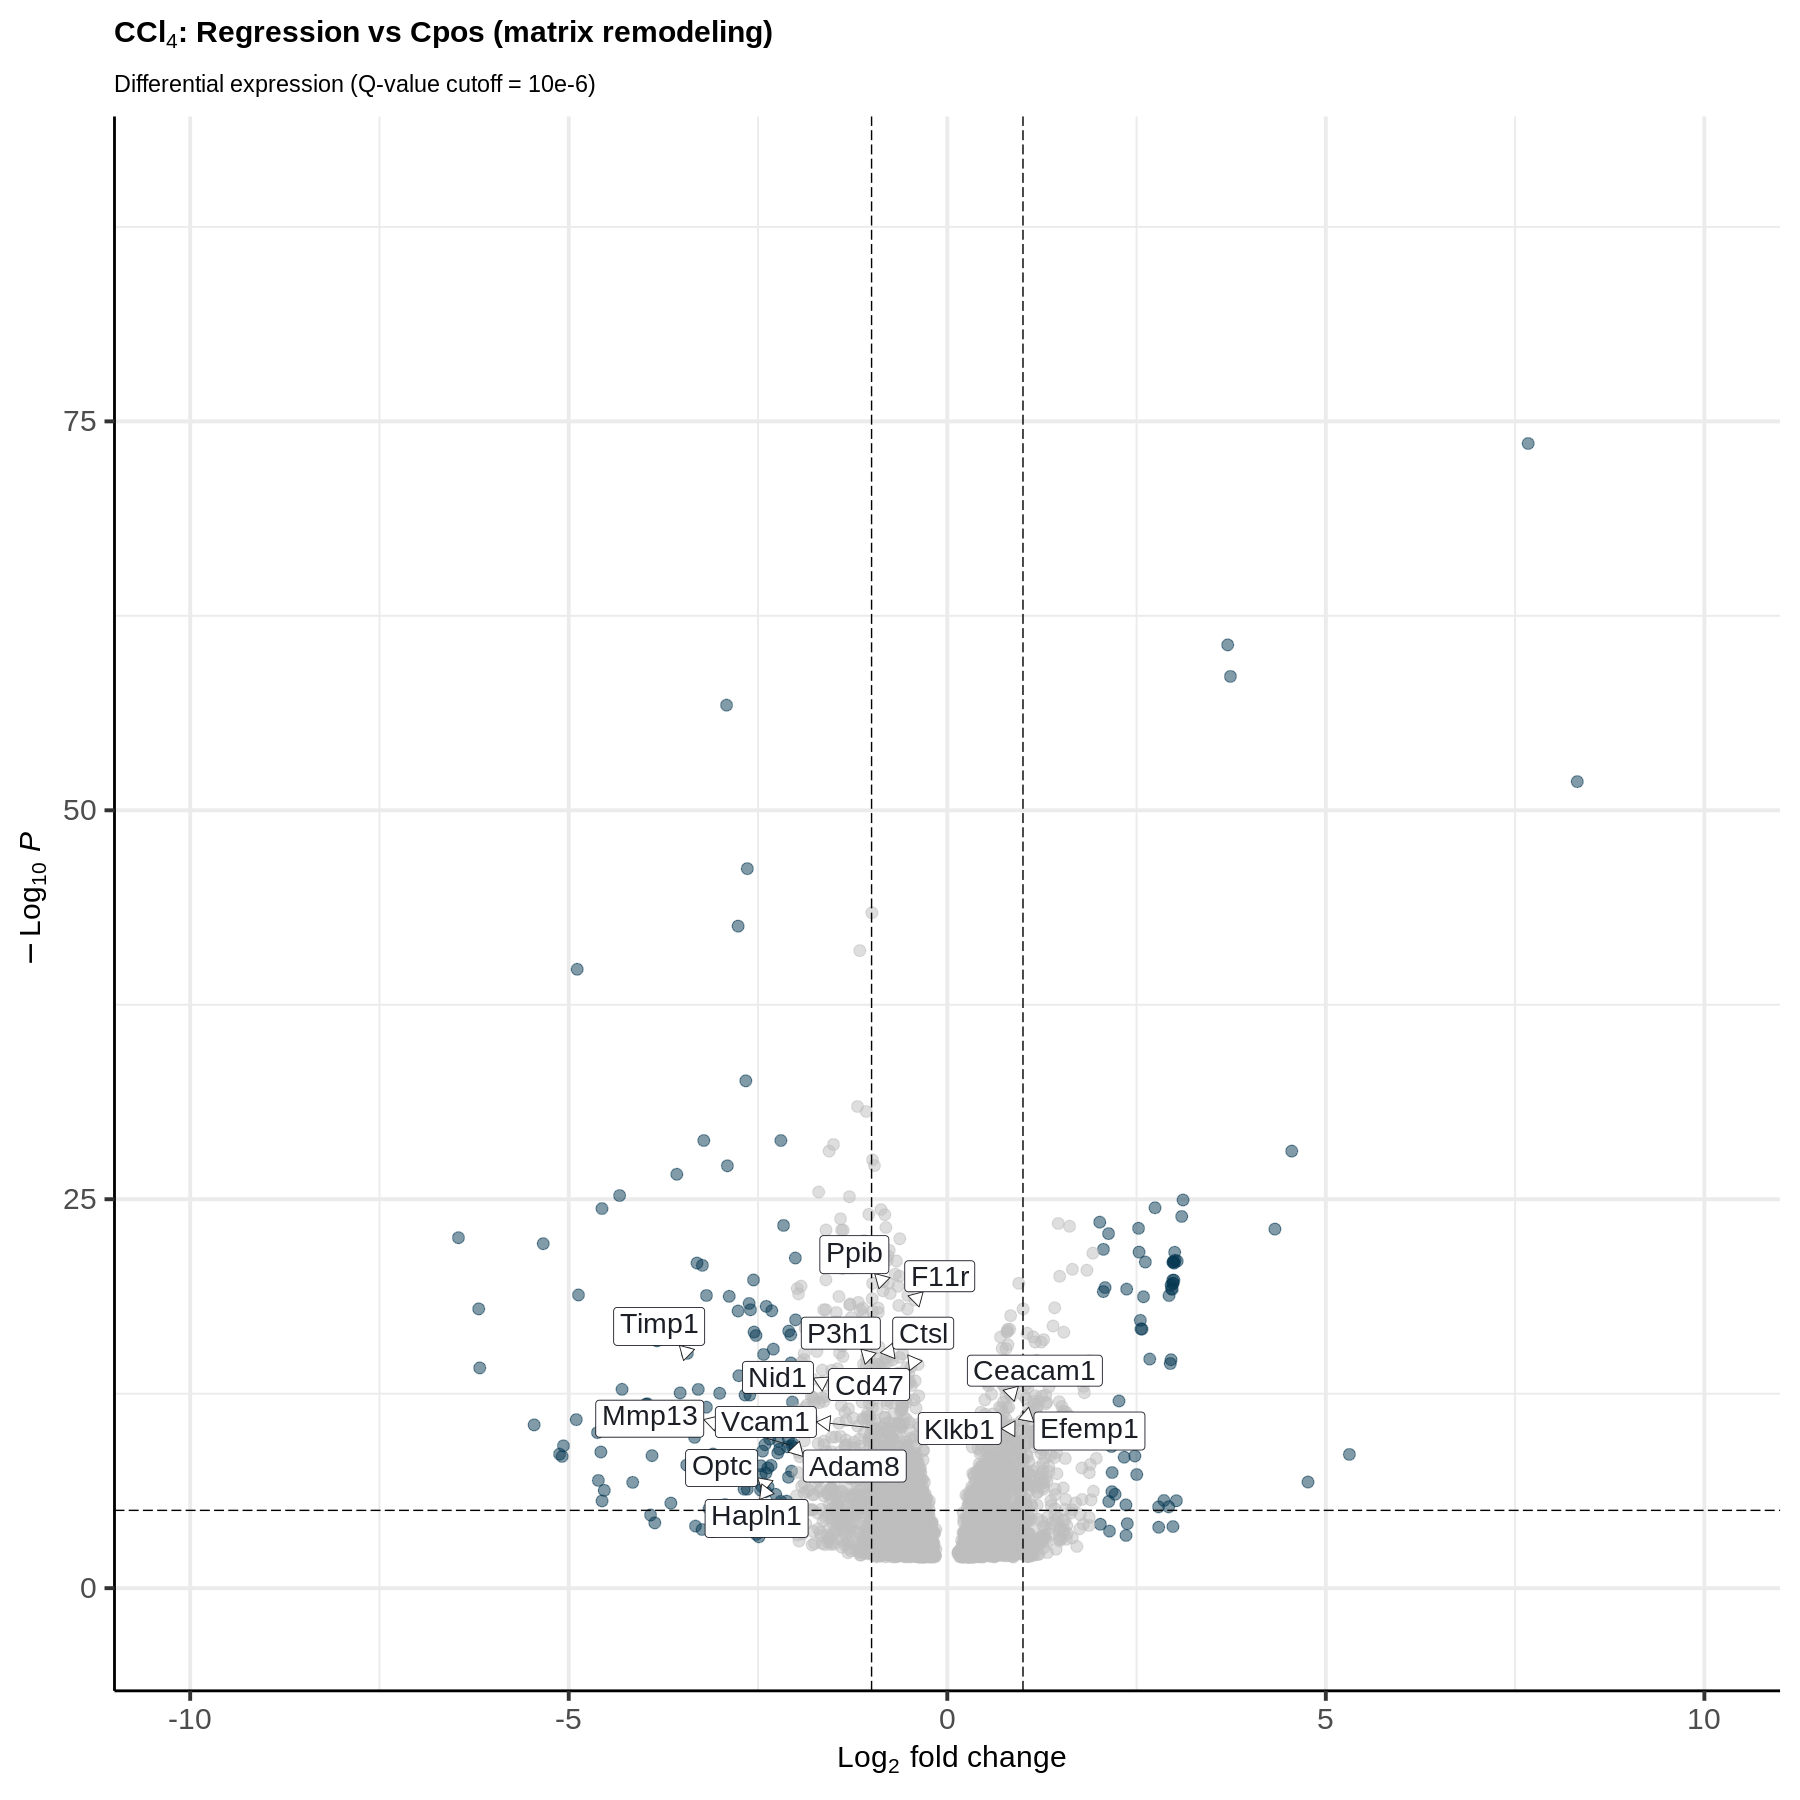

In [93]:
ccl4_target_reg <- EnhancedVolcano(ccl4_reg_pos,
                lab = rownames(ccl4_reg_pos),
                selectLab = gene_set_matrix_immune,
                colCustom = keyvals_ccl4,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = expression(bold(paste(CCl[4], ": Regression vs Cpos (matrix remodeling)",sep=""))),
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
                pCutoff = 10e-6,
                FCcutoff = 1,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 15,
                boxedLabels = TRUE,
                parseLabels = TRUE,
                labCol = '#1C1E26'
               ) + theme(legend.position = "none")

ccl4_target_reg

In [94]:
gene_set_taa <- matrix_pathway$Gene

Warning message:
"ggrepel: 364 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


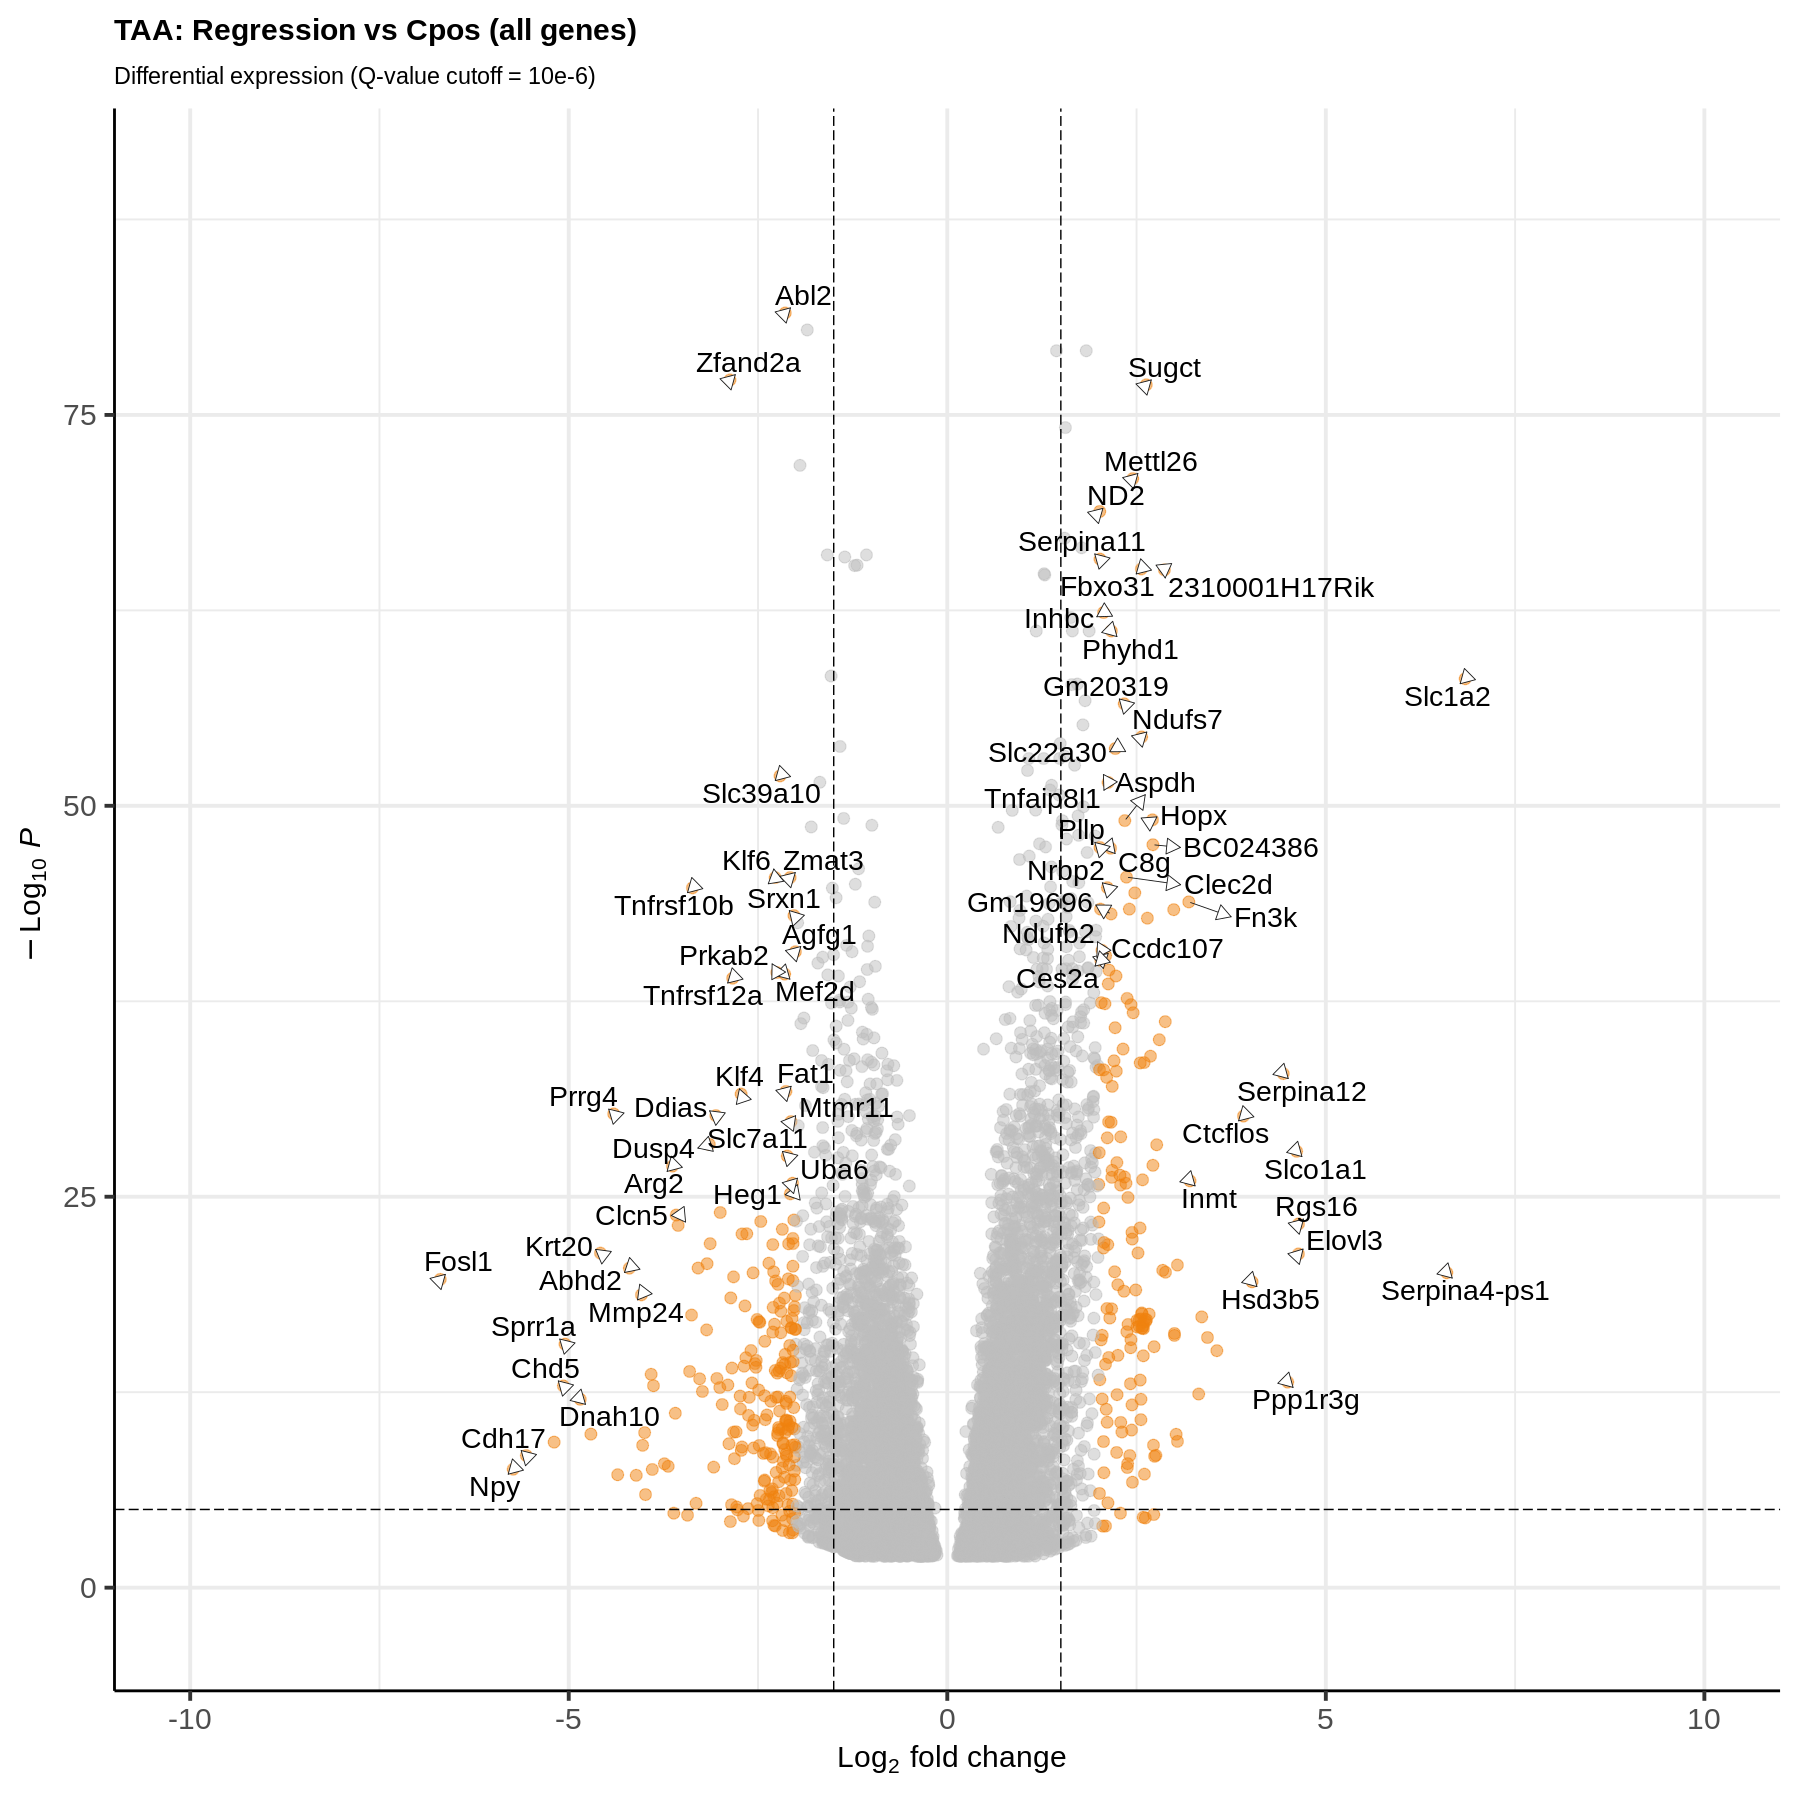

In [95]:
taa_all_reg <- EnhancedVolcano(taa_reg_pos,
                lab = rownames(taa_reg_pos),
                selectLab = rownames(taa_reg_pos)[which(names(keyvals_taa) %in% c('high', 'low'))],
                colCustom = keyvals_taa,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = "TAA: Regression vs Cpos (all genes)",
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
#                legend.position = "none",
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                max.overlaps = 10,
               ) + theme(legend.position = "none")

taa_all_reg

Warning message:
"ggrepel: 118 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


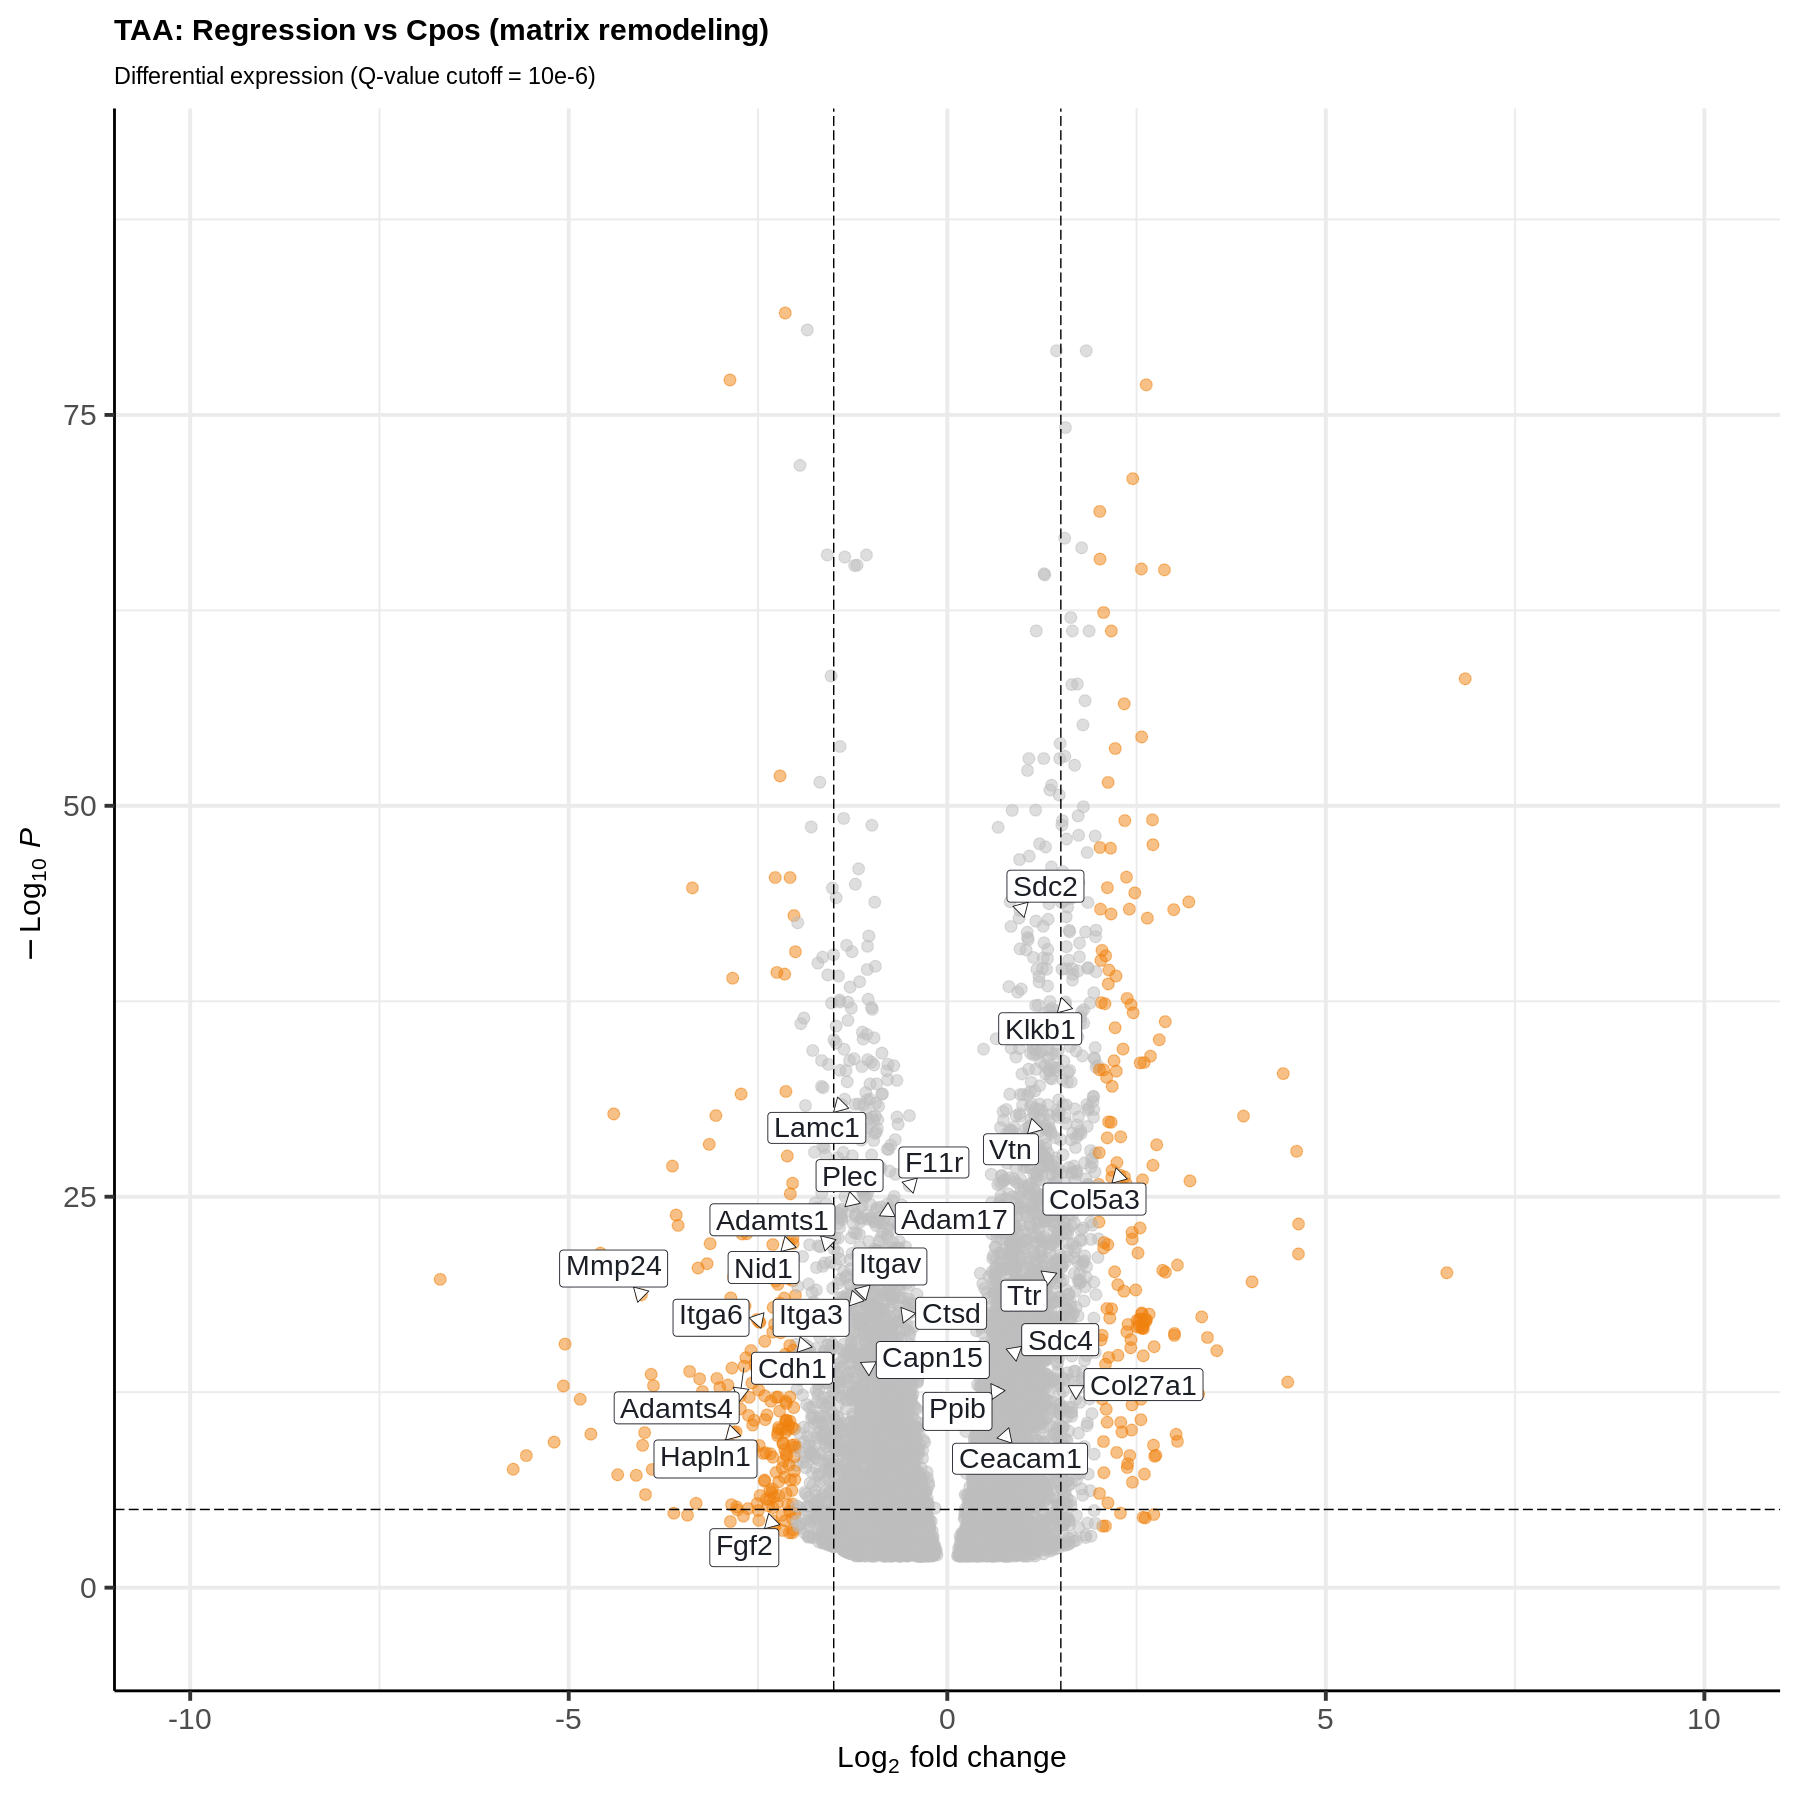

In [96]:
taa_target_reg <- EnhancedVolcano(taa_reg_pos,
                lab = rownames(taa_reg_pos),
                selectLab = gene_set_taa,
                colCustom = keyvals_taa,
                x = "log2FoldChange",
                xlim = c(-10, 10),
                y = "padj",
                ylim = c(-2, 90),
                title = "TAA: Regression vs Cpos (matrix remodeling)",
                subtitle = "Differential expression (Q-value cutoff = 10e-6)",
                caption = NULL,
#                legend.position = "none",
                pCutoff = 10e-6,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.25,
                boxedLabels = TRUE,
                parseLabels = TRUE,
                labCol = '#1C1E26',
                max.overlaps = 15
               ) + theme(legend.position = "none")

taa_target_reg

Warning message:
"ggrepel: 178 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 385 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 98 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 126 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


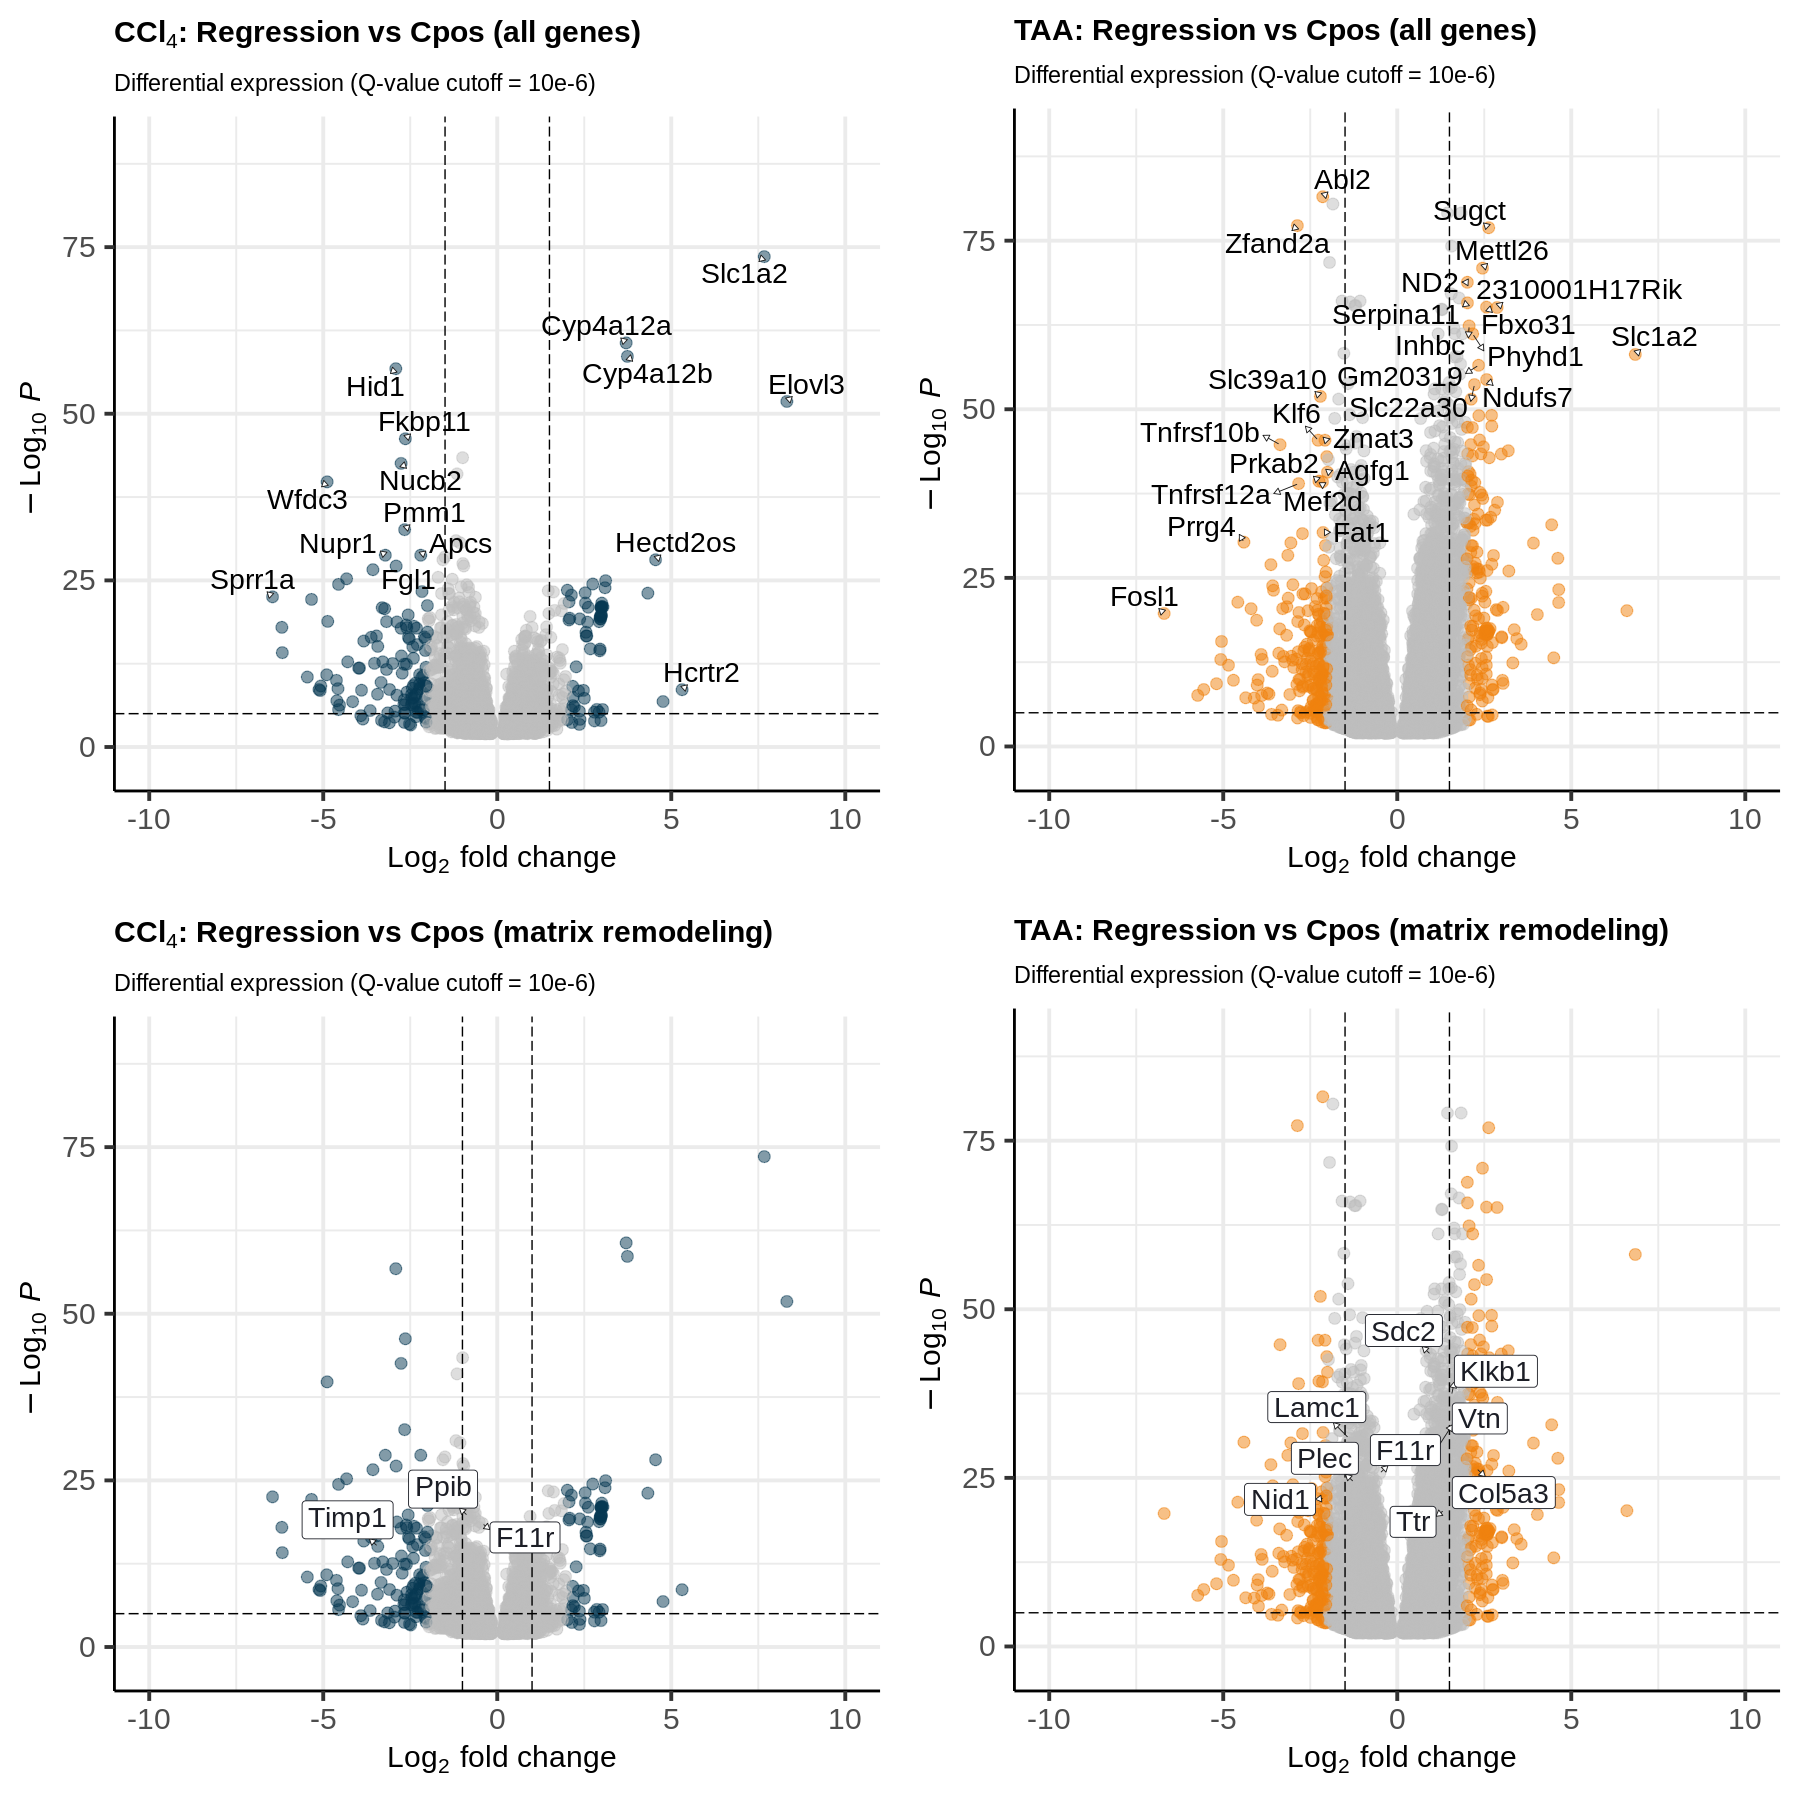

In [97]:
options(repr.plot.width = 15, repr.plot.height = 15)

p_all <- ggarrange(ccl_all_reg, taa_all_reg, ccl4_target_reg, taa_target_reg,
          ncol = 2, nrow = 2)

p_all

## Combined plots

Warning message:
"ggrepel: 886 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1486 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 178 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 385 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


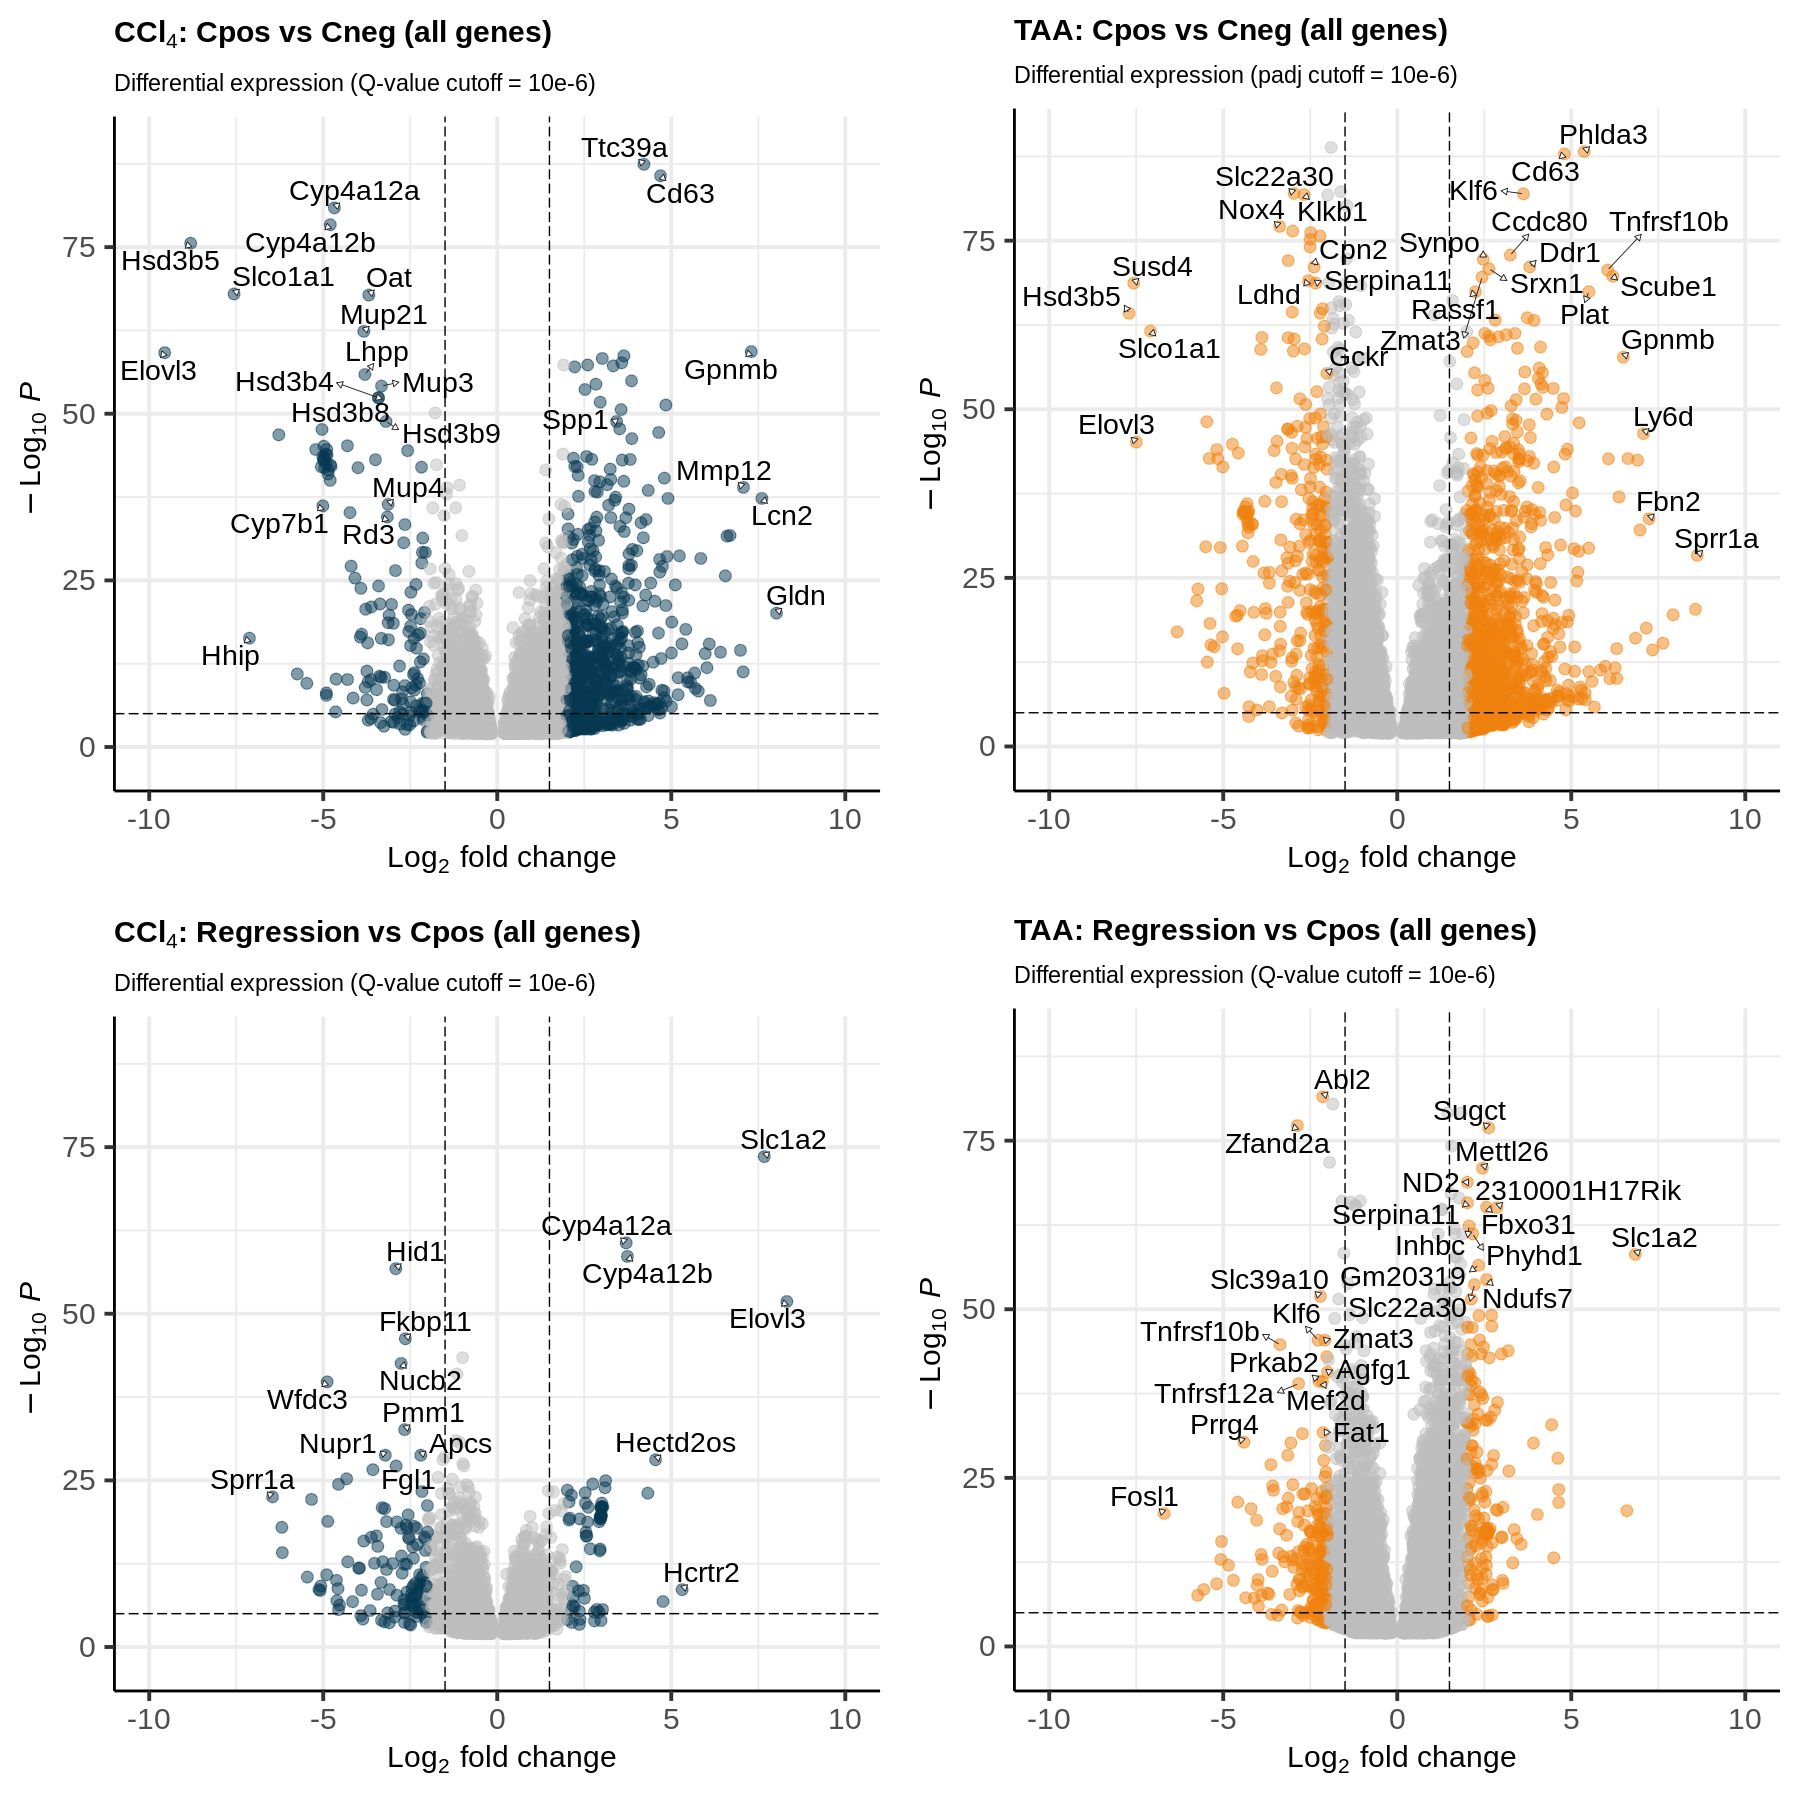

In [55]:
ggarrange(ccl_all, taa_all,
            ccl_all_reg, taa_all_reg,
          ncol = 2, nrow = 2)

Warning message:
"ggrepel: 158 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 186 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 98 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 126 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


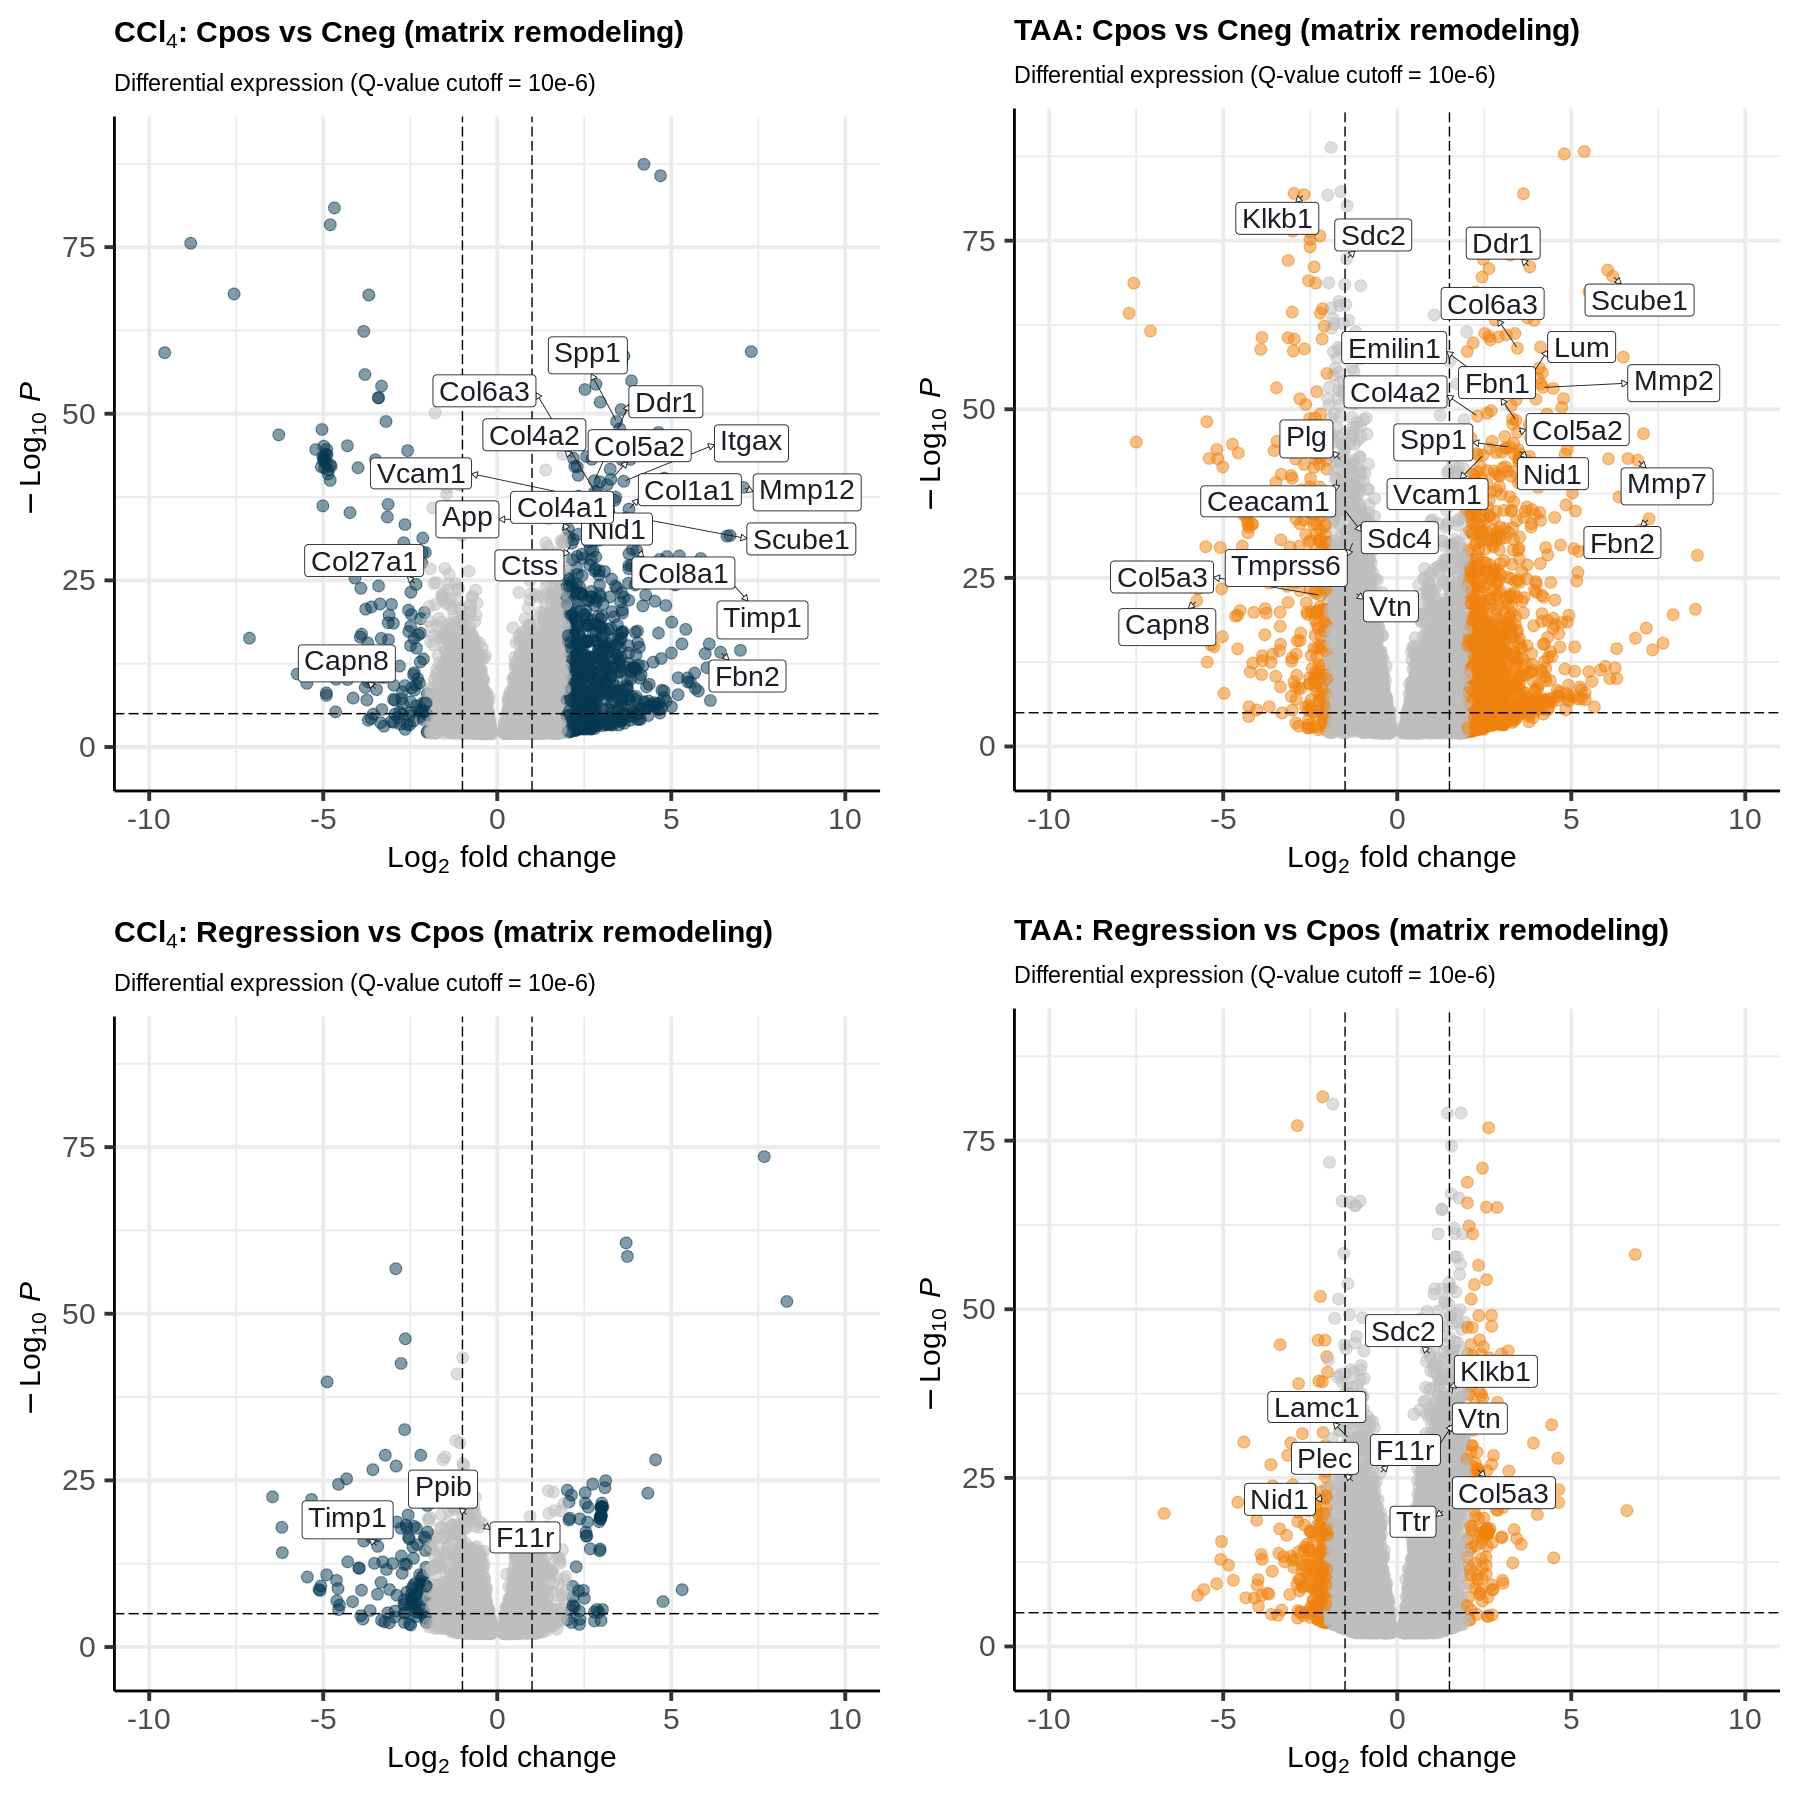

In [98]:
ggarrange(ccl4_target, taa_target,
            ccl4_target_reg, taa_target_reg,
          ncol = 2, nrow = 2)

## CCL4 vs TAA

In [10]:
res_ccl4_taa_cir <- read.csv("03_outputs/03/res_ccl4_taa_cir.csv", row.names = 1)
res_ccl4_r2_r1 <- read.csv("03_outputs/03/res_ccl4_r2_r1.csv", row.names = 1)
res_taa_r2_r1 <- read.csv("03_outputs/03/res_taa_r2_r1.csv", row.names = 1)
res_ccl4_taa_r1_r1 <- read.csv("03_outputs/03/res_ccl4_taa_r1_r1.csv", row.names = 1)
res_ccl4_taa_r2_r2 <- read.csv("03_outputs/03/res_ccl4_taa_r2_r2.csv", row.names = 1)

In [47]:
ccl4_taa_cir_v <- EnhancedVolcano(res_ccl4_taa_cir,
                lab = rownames(res_ccl4_taa_cir),
                x = "log2FoldChange",
  #              xlim = c(-5, 5),
                y = "pvalue",
                pCutoffCol = "padj",
 #              ylim = c(0, 12.5),
                title = "",
                subtitle = "",
                caption = NULL,
                ylab = NULL,
                pCutoff = 0.05,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                max.overlaps = 20,
                boxedLabels = FALSE,
                col=hcl.colors(4, "TealRose", rev = TRUE)
               ) + theme(legend.position = "none")

In [48]:
ccl4_taa_r1_v <- EnhancedVolcano(res_ccl4_taa_r1_r1,
                lab = rownames(res_ccl4_taa_r1_r1),
                x = "log2FoldChange",
  #              xlim = c(-5, 5),
                y = "pvalue",
                pCutoffCol = "padj",
 #              ylim = c(0, 12.5),
                title = "",
                subtitle = "",
                caption = NULL,
                ylab = NULL,
                pCutoff = 0.05,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                max.overlaps = 20,
                boxedLabels = FALSE,
                col=hcl.colors(4, "TealRose", rev = TRUE)
               ) + theme(legend.position = "none")



In [49]:
ccl4_taa_r2_v <- EnhancedVolcano(res_ccl4_taa_r2_r2,
                lab = rownames(res_ccl4_taa_r2_r2),
                x = "log2FoldChange",
  #              xlim = c(-5, 5),
                y = "pvalue",
                pCutoffCol = "padj",
 #              ylim = c(0, 12.5),
                title = "",
                subtitle = "",
                caption = NULL,
                ylab = NULL,
                pCutoff = 0.05,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                max.overlaps = 20,
                boxedLabels = FALSE,
                col=hcl.colors(4, "TealRose", rev = TRUE)
               ) + theme(legend.position = "none")



In [53]:
taa_r2_r1_v <- EnhancedVolcano(res_taa_r2_r1,
                lab = rownames(res_taa_r2_r1),
                x = "log2FoldChange",
  #              xlim = c(-5, 5),
                y = "pvalue",
                pCutoffCol = "padj",
 #              ylim = c(0, 12.5),
                title = "",
                subtitle = "",
                caption = NULL,
                ylab = NULL,
                pCutoff = 0.05,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                max.overlaps = 20,
                boxedLabels = FALSE,
                col=hcl.colors(4, "TealRose", rev = TRUE)
               ) + theme(legend.position = "none")



In [54]:
ccl4_r2_r1_v <- EnhancedVolcano(res_ccl4_r2_r1,
                lab = rownames(res_ccl4_r2_r1),
                x = "log2FoldChange",
  #              xlim = c(-5, 5),
                y = "pvalue",
                pCutoffCol = "padj",
 #              ylim = c(0, 12.5),
                title = "",
                subtitle = "",
                caption = NULL,
                ylab = NULL,
                pCutoff = 0.05,
                FCcutoff = 1.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                max.overlaps = 20,
                boxedLabels = FALSE,
                col=hcl.colors(4, "TealRose", rev = TRUE)
               ) + theme(legend.position = "none")



Warning message:
"ggrepel: 1062 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


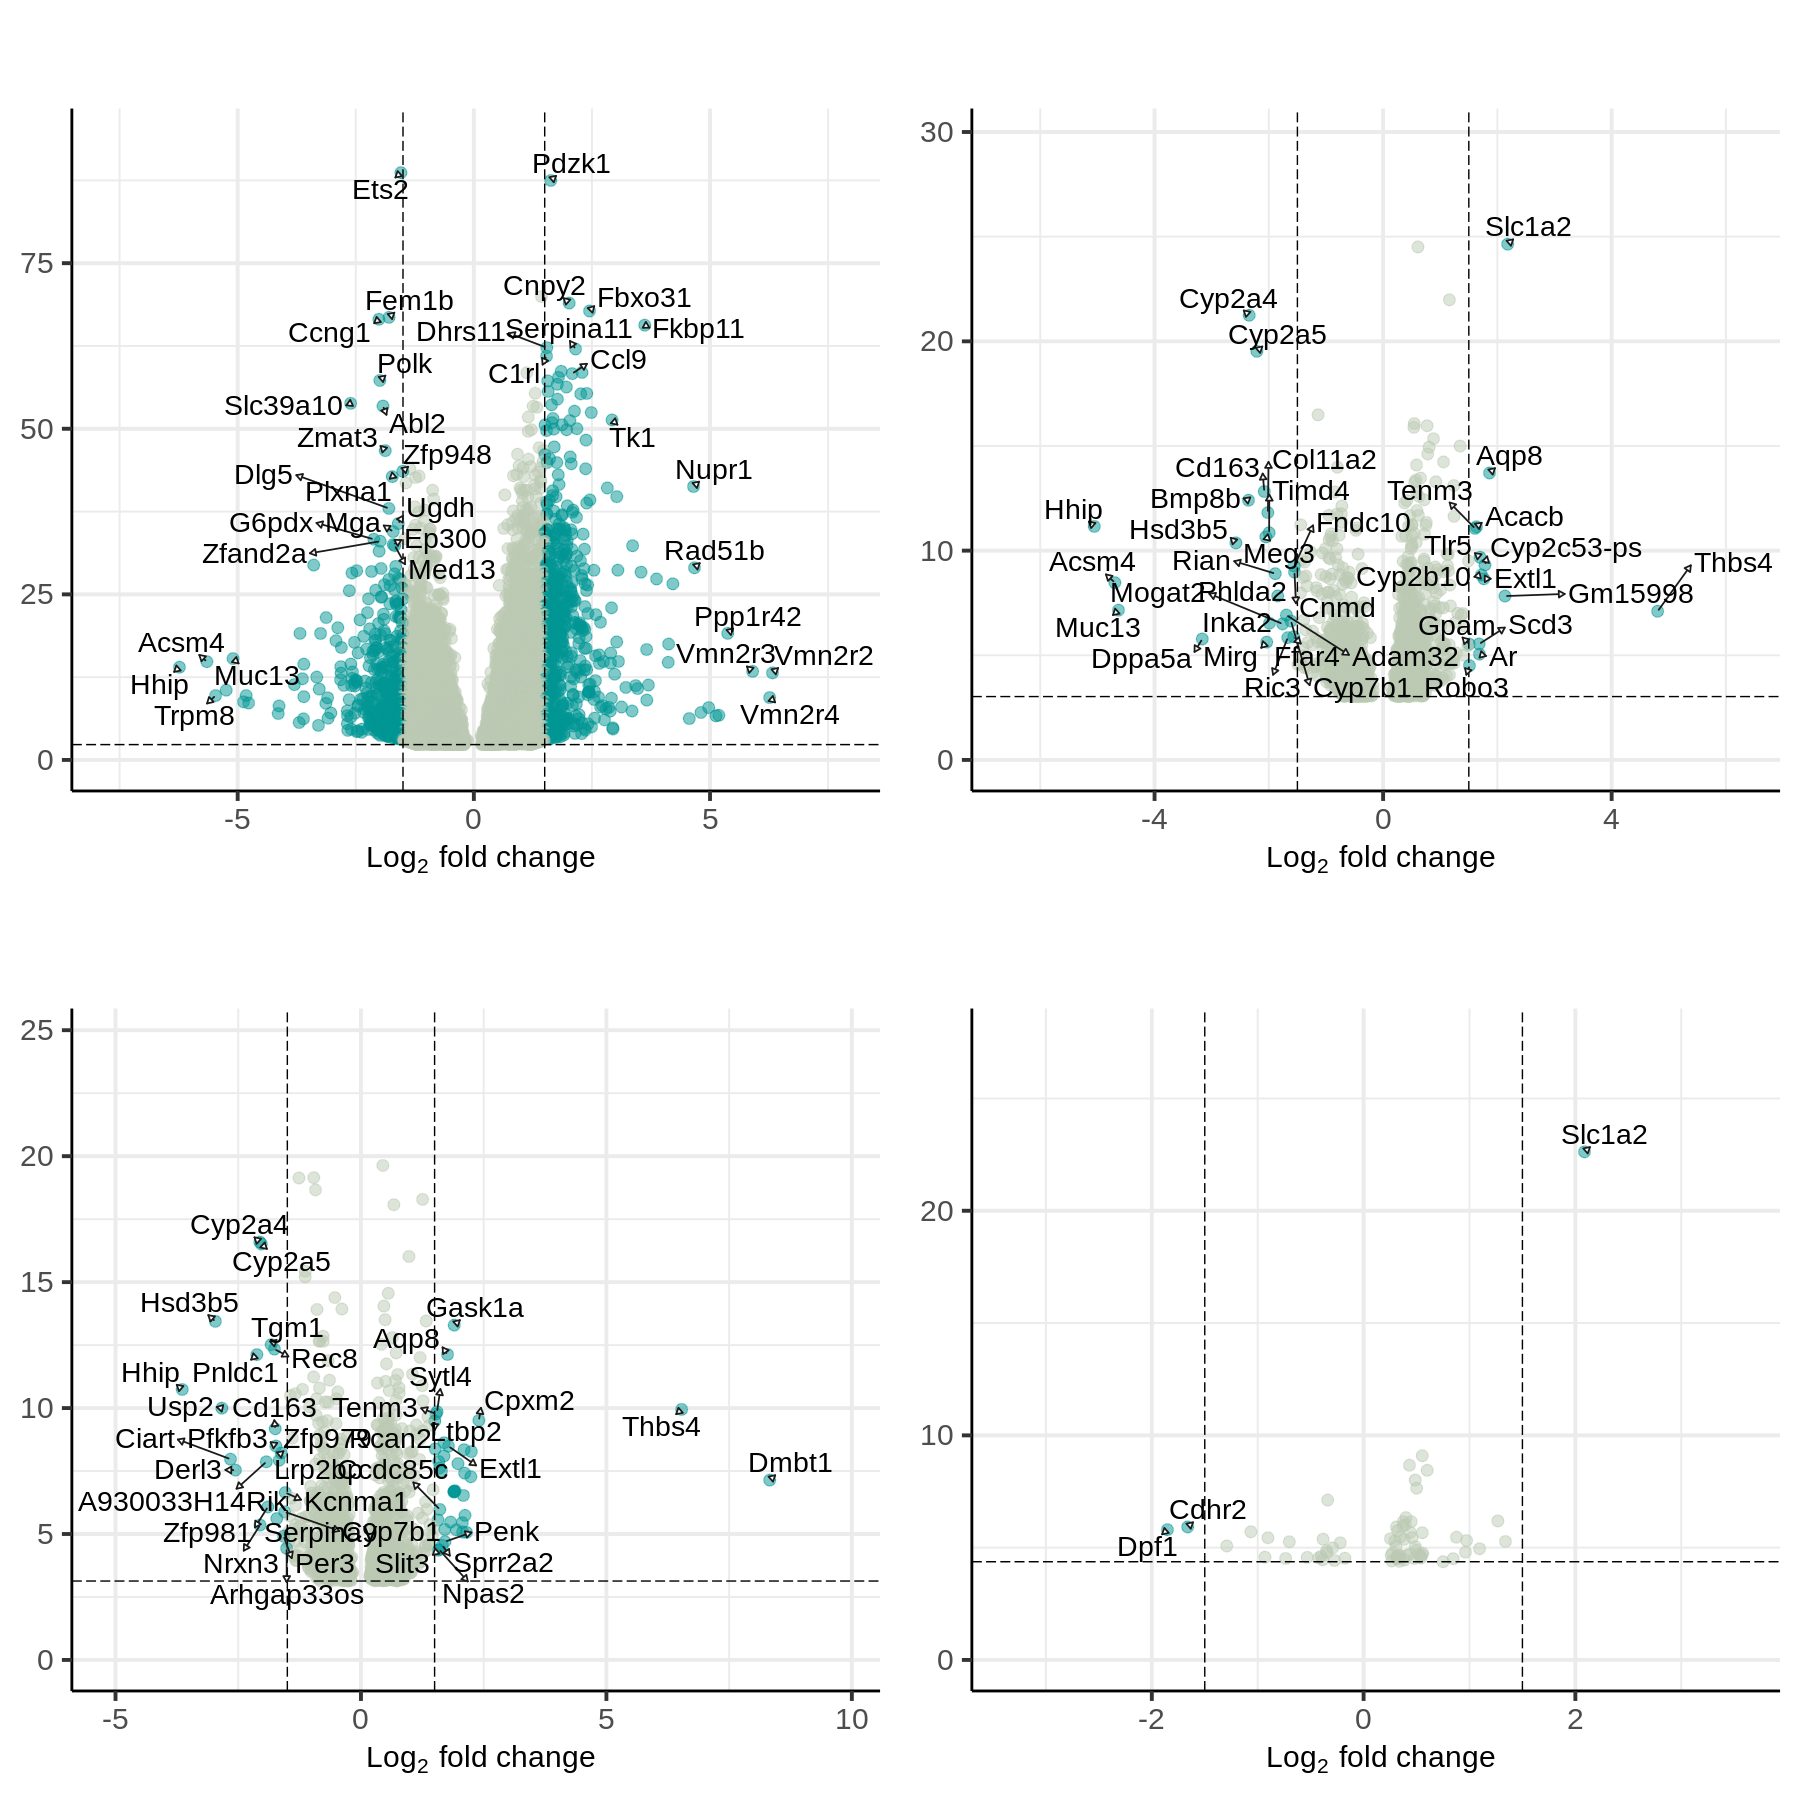

In [56]:
options(repr.plot.width = 15, repr.plot.height = 15)

p_all <- ggarrange(ccl4_taa_cir_v, ccl4_taa_r1_v, ccl4_taa_r2_v, taa_r2_r1_v,
          ncol = 2, nrow = 2)

p_all

## Outputs

In [87]:
ggsave(plot = ccl_all, filename = "03_outputs/05/ccl4_all_volcano_wald.png")
ggsave(plot = ccl4_target, filename = "03_outputs/05/ccl4_target_volcano_wald.png")
ggsave(plot = taa_all, filename = "03_outputs/05/taa_all_volcano_wald.png")
ggsave(plot = taa_target, filename = "03_outputs/05/taa_target_volcano_wald.png")

Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 863 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 145 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 1462 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 165 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


In [89]:
ggsave(plot = p_all, filename = "03_outputs/05/volcanos_combined_wald.png", width = 15, height = 15)

Warning message:
"ggrepel: 845 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 136 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1449 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 159 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
